## Project Name: 
Sentiment Analytics
## Company Name: 
Sentiment Analytics 82
## Business Justification 
Gauge public sentiments for products and/or brands. 
## Project Description
This project is based on retrieving twitter data from their website through a developer api and run some basic analysis on the data. 


# Logical Model 

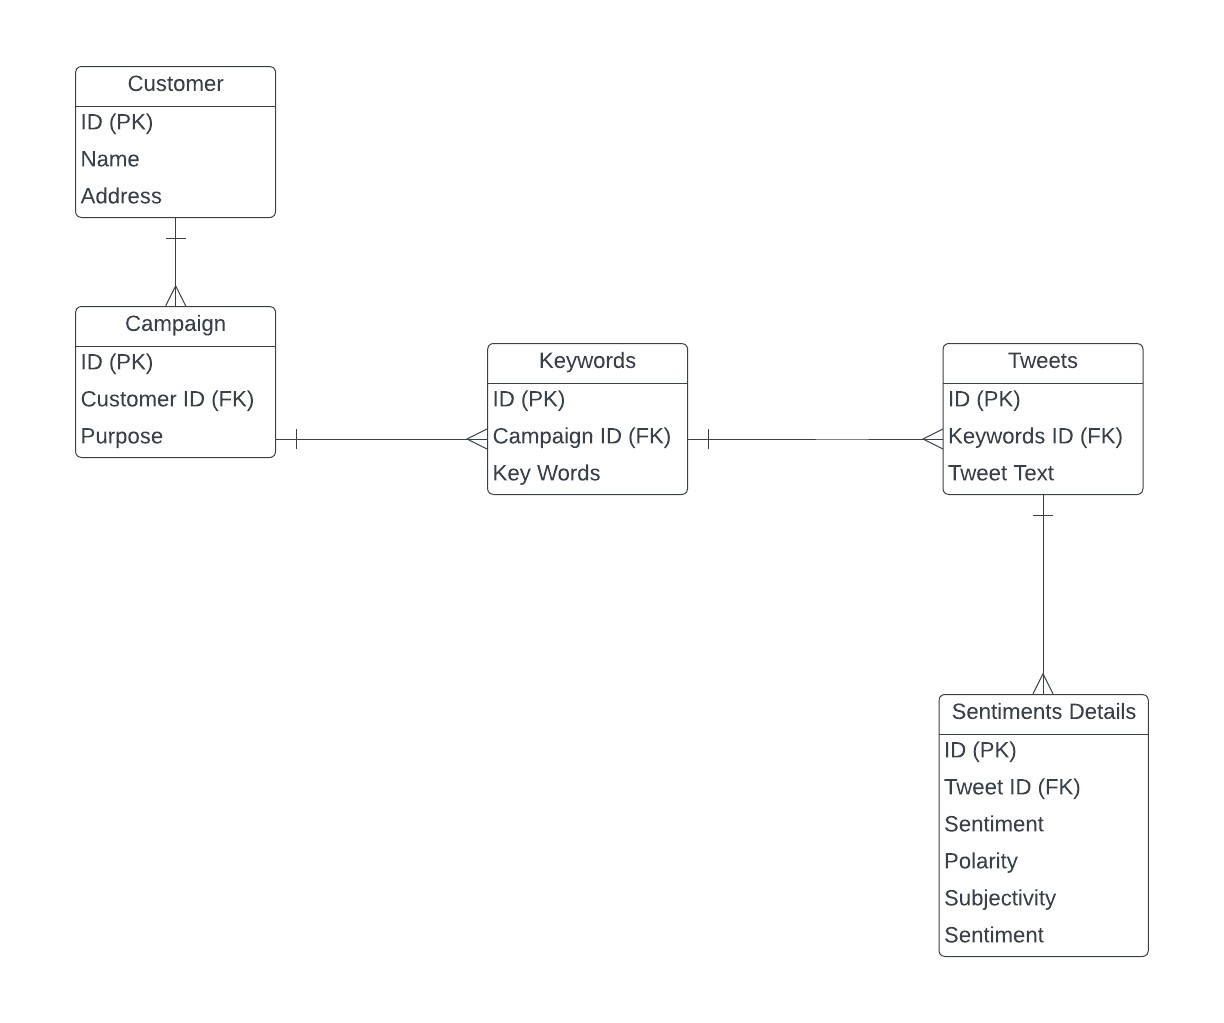

# Physical Model

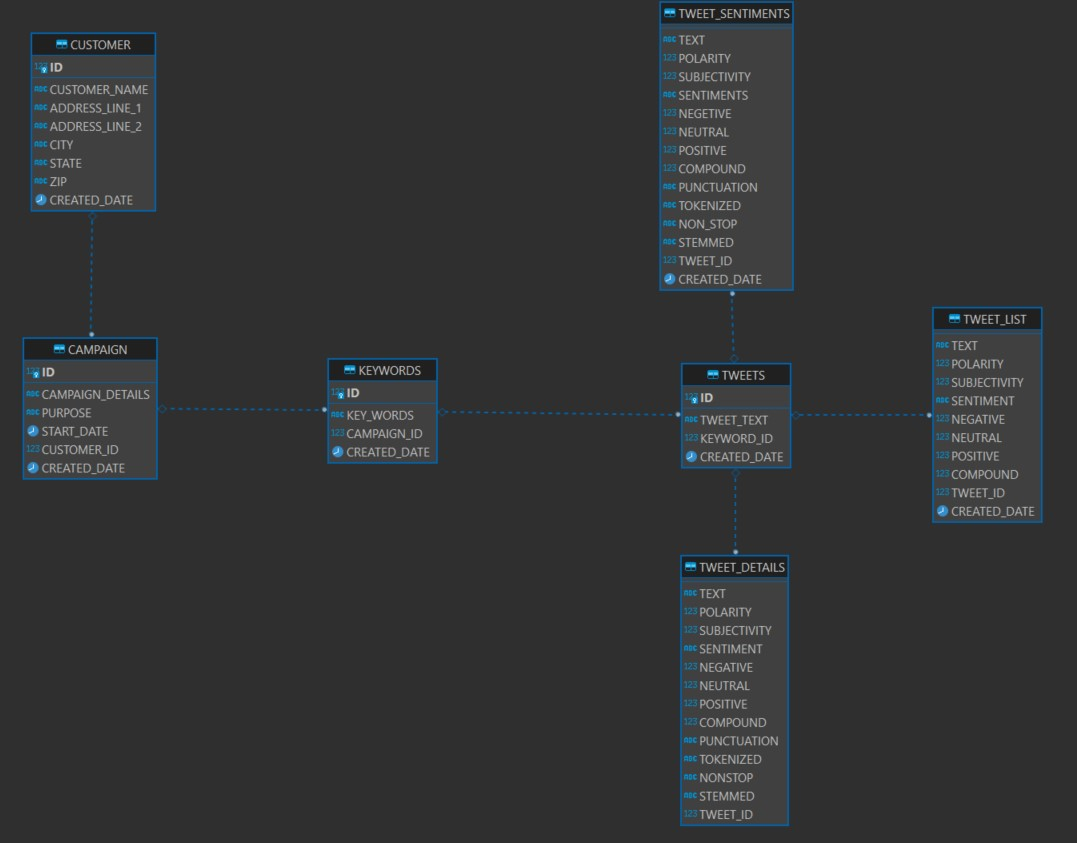

# DDL

-- public."CUSTOMER" definition

-- Drop table

-- DROP TABLE public."CUSTOMER";

CREATE TABLE public."CUSTOMER" (
	"ID" serial4 NOT NULL,
	"CUSTOMER_NAME" varchar(1000) NULL,
	"ADDRESS_LINE_1" varchar(100) NULL,
	"ADDRESS_LINE_2" varchar(100) NULL,
	"CITY" varchar(100) NULL,
	"STATE" varchar(50) NULL,
	"ZIP" varchar(5) NULL,
	"CREATED_DATE" date NULL,
	CONSTRAINT "CUSTOMER_pkey" PRIMARY KEY ("ID")
);


-- public."CAMPAIGN" definition

-- Drop table

-- DROP TABLE public."CAMPAIGN";

CREATE TABLE public."CAMPAIGN" (
	"ID" int4 NOT NULL DEFAULT nextval('"CAMPAIGN_id_seq"'::regclass),
	"CAMPAIGN_DETAILS" varchar(1000) NULL,
	"PURPOSE" varchar(100) NULL,
	"START_DATE" date NULL,
	"CUSTOMER_ID" int4 NULL,
	"CREATED_DATE" date NULL,
	CONSTRAINT "CAMPAIGN_pkey" PRIMARY KEY ("ID"),
	CONSTRAINT fk_cus_to_cmpn FOREIGN KEY ("CUSTOMER_ID") REFERENCES public."CUSTOMER"("ID")
);


-- public."KEYWORDS" definition

-- Drop table

-- DROP TABLE public."KEYWORDS";

CREATE TABLE public."KEYWORDS" (
	"ID" int4 NOT NULL DEFAULT nextval('"KEYWORDS_id_seq"'::regclass),
	"KEY_WORDS" varchar(1000) NULL,
	"CAMPAIGN_ID" int4 NULL,
	"CREATED_DATE" date NULL,
	CONSTRAINT "KEYWORDS_pkey" PRIMARY KEY ("ID"),
	CONSTRAINT fk_cus_to_cmpn FOREIGN KEY ("CAMPAIGN_ID") REFERENCES public."CAMPAIGN"("ID")
);


-- public."TWEETS" definition

-- Drop table

-- DROP TABLE public."TWEETS";

CREATE TABLE public."TWEETS" (
	"ID" int4 NOT NULL DEFAULT nextval('tweets_id_seq'::regclass),
	"TWEET_TEXT" varchar(1000) NULL,
	"KEYWORD_ID" int4 NULL,
	"CREATED_DATE" date NULL,
	CONSTRAINT tweets_pkey PRIMARY KEY ("ID"),
	CONSTRAINT fk_keywords_to_tweets FOREIGN KEY ("KEYWORD_ID") REFERENCES public."KEYWORDS"("ID")
);


-- public."TWEET_DETAILS" definition

-- Drop table

-- DROP TABLE public."TWEET_DETAILS";

CREATE TABLE public."TWEET_DETAILS" (
	"TEXT" varchar(1000) NULL,
	"POLARITY" float4 NULL,
	"SUBJECTIVITY" float4 NULL,
	"SENTIMENT" varchar(50) NULL,
	"NEGATIVE" float4 NULL,
	"NEUTRAL" float4 NULL,
	"POSITIVE" float4 NULL,
	"COMPOUND" float4 NULL,
	"PUNCTUATION" varchar(256) NULL,
	"TOKENIZED" varchar(256) NULL,
	"NONSTOP" varchar(256) NULL,
	"STEMMED" varchar(256) NULL,
	"TWEET_ID" int4 NULL,
	CONSTRAINT fk_td_to_tweets FOREIGN KEY ("TWEET_ID") REFERENCES public."TWEETS"("ID")
);


-- public."TWEET_LIST" definition

-- Drop table

-- DROP TABLE public."TWEET_LIST";

CREATE TABLE public."TWEET_LIST" (
	"TEXT" varchar(256) NULL,
	"POLARITY" float4 NULL,
	"SUBJECTIVITY" float4 NULL,
	"SENTIMENT" varchar(50) NULL,
	"NEGATIVE" float4 NULL,
	"NEUTRAL" float4 NULL,
	"POSITIVE" float4 NULL,
	"COMPOUND" float4 NULL,
	"TWEET_ID" int4 NULL,
	"CREATED_DATE" date NULL,
	CONSTRAINT fk_tl_to_tweets FOREIGN KEY ("TWEET_ID") REFERENCES public."TWEETS"("ID")
);


-- public."TWEET_SENTIMENTS" definition

-- Drop table

-- DROP TABLE public."TWEET_SENTIMENTS";

CREATE TABLE public."TWEET_SENTIMENTS" (
	"TEXT" varchar(256) NULL,
	"POLARITY" float4 NULL,
	"SUBJECTIVITY" float4 NULL,
	"SENTIMENTS" varchar(50) NULL,
	"NEGETIVE" float4 NULL,
	"NEUTRAL" float4 NULL,
	"POSITIVE" float4 NULL,
	"COMPOUND" float4 NULL,
	"PUNCTUATION" varchar(256) NULL,
	"TOKENIZED" varchar(256) NULL,
	"NON_STOP" varchar(256) NULL,
	"STEMMED" varchar(256) NULL,
	"TWEET_ID" int4 NULL,
	"CREATED_DATE" date NULL,
	CONSTRAINT fk_ts_to_tweets FOREIGN KEY ("TWEET_ID") REFERENCES public."TWEETS"("ID")
);


# Tech Stack

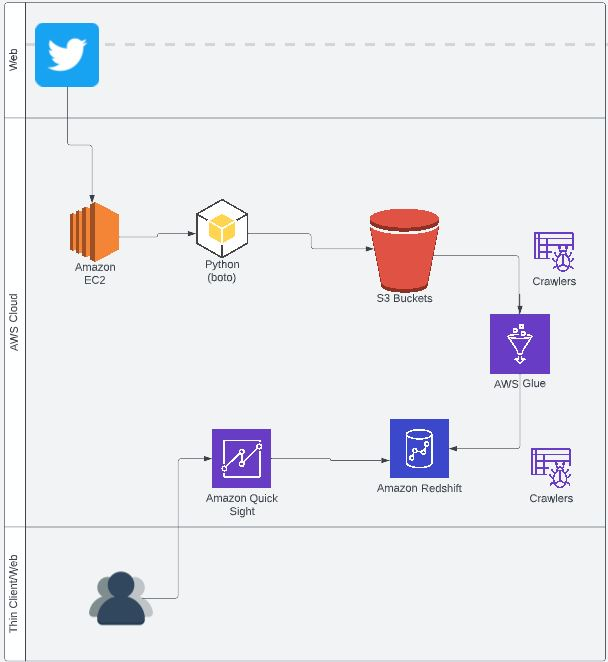

# Twitter

### Developer Account
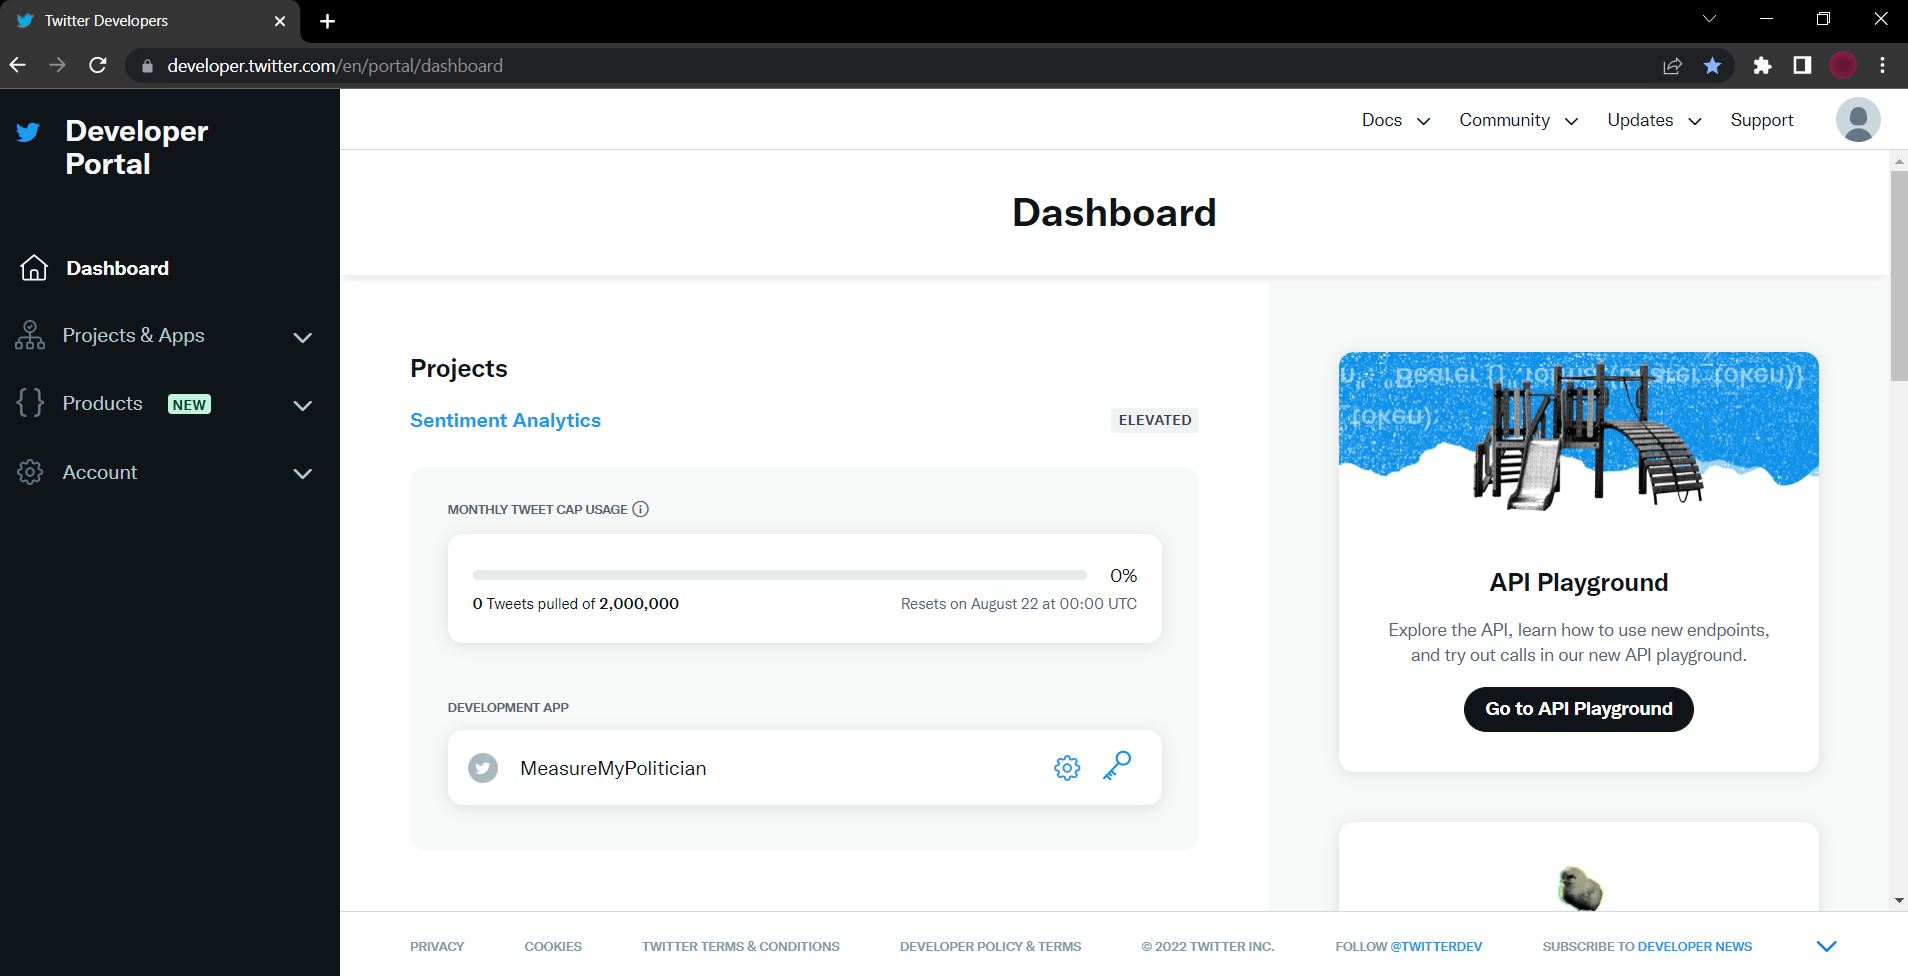


In [1]:
# Install Libraries
!pip install textblob
!pip install tweepy
!pip install boto3 pandas s3fs
!pip install pycountry
!pip install wordcloud
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com


In [2]:
# Import Libraries
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import nltk
nltk.download('punkt')
nltk.download('vader_lexicon')
nltk.download('stopwords')
import numpy as np
import os
import boto3
from botocore.exceptions import ClientError
import io
import nltk
from pycountry import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from pprint import pprint
import pathlib

[nltk_data] Downloading package punkt to /home/ec2-user/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/ec2-user/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ec2-user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Application
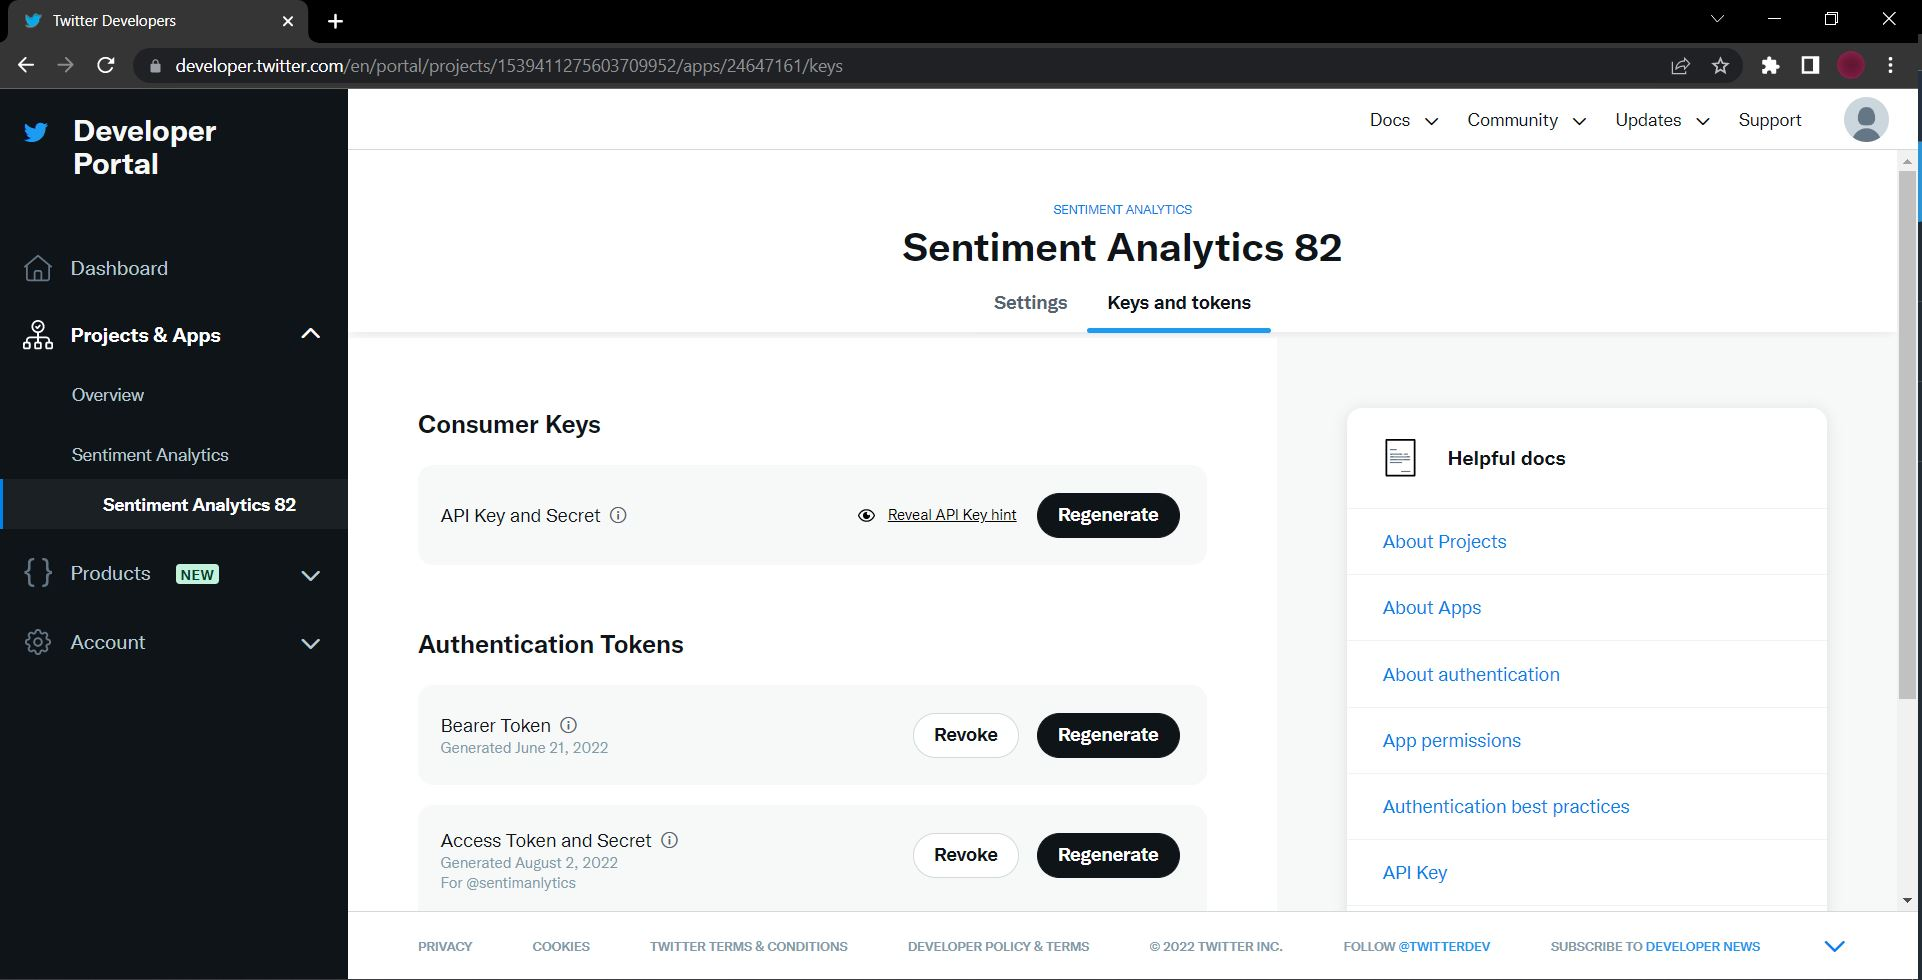


In [3]:
# Authentication
consumerKey = '*****************************'
consumerSecret = '*****************************'
accessToken = '*****************************'
accessTokenSecret = '*****************************'
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [4]:
#Sentiment Analysis
def percentage(part,whole):
 return 100 * float(part)/float(whole)
keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))
tweets = tweepy.Cursor(api.search_tweets, q=keyword).items(noOfTweet)
positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []
for tweet in tweets:
 
 #print(tweet.text)
 tweet_list.append(tweet.text)
 analysis = TextBlob(tweet.text)
 score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
 neg = score['neg']
 neu = score['neu']
 pos = score['pos']
 comp = score['compound']
 polarity += analysis.sentiment.polarity
 
 if neg > pos:
     negative_list.append(tweet.text)
     negative += 1
 elif pos > neg:
     positive_list.append(tweet.text)
     positive += 1
 
 elif pos == neg:
     neutral_list.append(tweet.text)
     neutral += 1
    
positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

Please enter keyword or hashtag to search:  walmart
Please enter how many tweets to analyze:  200


In [5]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  200
positive number:  75
negative number:  46
neutral number:  79


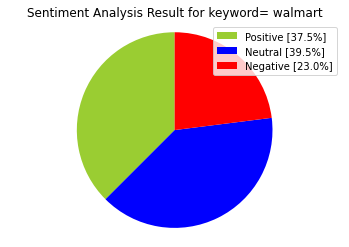

In [6]:
#Creating PieCart
labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword= "+keyword+"" )
plt.axis('equal')
plt.show()

In [7]:
keyword = pd.DataFrame(
    data={"KeyWords": [keyword]},
    columns=["KeyWords"],
)

#keyword.to_csv("/home/ec2-user/twitter-analytics/keyword.csv") 

In [8]:
AWS_S3_BUCKET = "*****************************"
AWS_ACCESS_KEY_ID = "*****************************"
AWS_SECRET_ACCESS_KEY = "*****************************"
AWS_REGION_NAME = "us-east-1"

s3_client = boto3.client(
    "s3",
    region_name=AWS_REGION_NAME,
    aws_access_key_id= AWS_ACCESS_KEY_ID,
    aws_secret_access_key=AWS_SECRET_ACCESS_KEY,
)


/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/boto3/compat.py:88: PythonDeprecationWarning: Boto3 will no longer support Python 3.6 starting May 30, 2022. To continue receiving service updates, bug fixes, and security updates please upgrade to Python 3.7 or later. More information can be found here: https://aws.amazon.com/blogs/developer/python-support-policy-updates-for-aws-sdks-and-tools/
  warnings.warn(warning, PythonDeprecationWarning)


In [9]:
#Upload Tweet FIle to S3, converting it form data frame to a csv file
with io.StringIO() as csv_buffer:
    tweet_list.to_csv(csv_buffer, index=False)

    response = s3_client.put_object(
        Bucket=AWS_S3_BUCKET, Key="files/tweet_list.csv", Body=csv_buffer.getvalue()
    )

    status = response.get("ResponseMetadata", {}).get("HTTPStatusCode")

    if status == 200:
        print(f"Successful S3 put_object response. Status - {status}")
    else:
        print(f"Unsuccessful S3 put_object response. Status - {status}")

Successful S3 put_object response. Status - 200


In [10]:
 # Upload File for the neutral list created 
with io.StringIO() as csv_buffer:
    neutral_list.to_csv(csv_buffer, index=False)

    response = s3_client.put_object(
        Bucket=AWS_S3_BUCKET, Key="files/neutral_list.csv", Body=csv_buffer.getvalue()
    )

    status = response.get("ResponseMetadata", {}).get("HTTPStatusCode")

    if status == 200:
        print(f"Successful S3 put_object response. Status - {status}")
    else:
        print(f"Unsuccessful S3 put_object response. Status - {status}")

Successful S3 put_object response. Status - 200


In [11]:
# Upload File for negative tweets
with io.StringIO() as csv_buffer:
    negative_list.to_csv(csv_buffer, index=False)

    response = s3_client.put_object(
        Bucket=AWS_S3_BUCKET, Key="files/negative_list.csv", Body=csv_buffer.getvalue()
    )

    status = response.get("ResponseMetadata", {}).get("HTTPStatusCode")

    if status == 200:
        print(f"Successful S3 put_object response. Status - {status}")
    else:
        print(f"Unsuccessful S3 put_object response. Status - {status}")

Successful S3 put_object response. Status - 200


In [12]:
# Upload Files for positive tweets
with io.StringIO() as csv_buffer:
    positive_list.to_csv(csv_buffer, index=False)

    response = s3_client.put_object(
        Bucket=AWS_S3_BUCKET, Key="files/positive_list.csv", Body=csv_buffer.getvalue()
    )

    status = response.get("ResponseMetadata", {}).get("HTTPStatusCode")
    if status == 200:
        print(f"Successful S3 put_object response. Status - {status}")
    else:
        print(f"Unsuccessful S3 put_object response. Status - {status}")

Successful S3 put_object response. Status - 200


In [13]:
# Upload the Keywords file
with io.StringIO() as csv_buffer:
    keyword.to_csv(csv_buffer, index=False)

    response = s3_client.put_object(
        Bucket=AWS_S3_BUCKET, Key="files/keyword.csv", Body=csv_buffer.getvalue()
    )

    status = response.get("ResponseMetadata", {}).get("HTTPStatusCode")
    if status == 200:
        print(f"Successful S3 put_object response. Status - {status}")
    else:
        print(f"Unsuccessful S3 put_object response. Status - {status}")

Successful S3 put_object response. Status - 200


# Uploaded files to S3
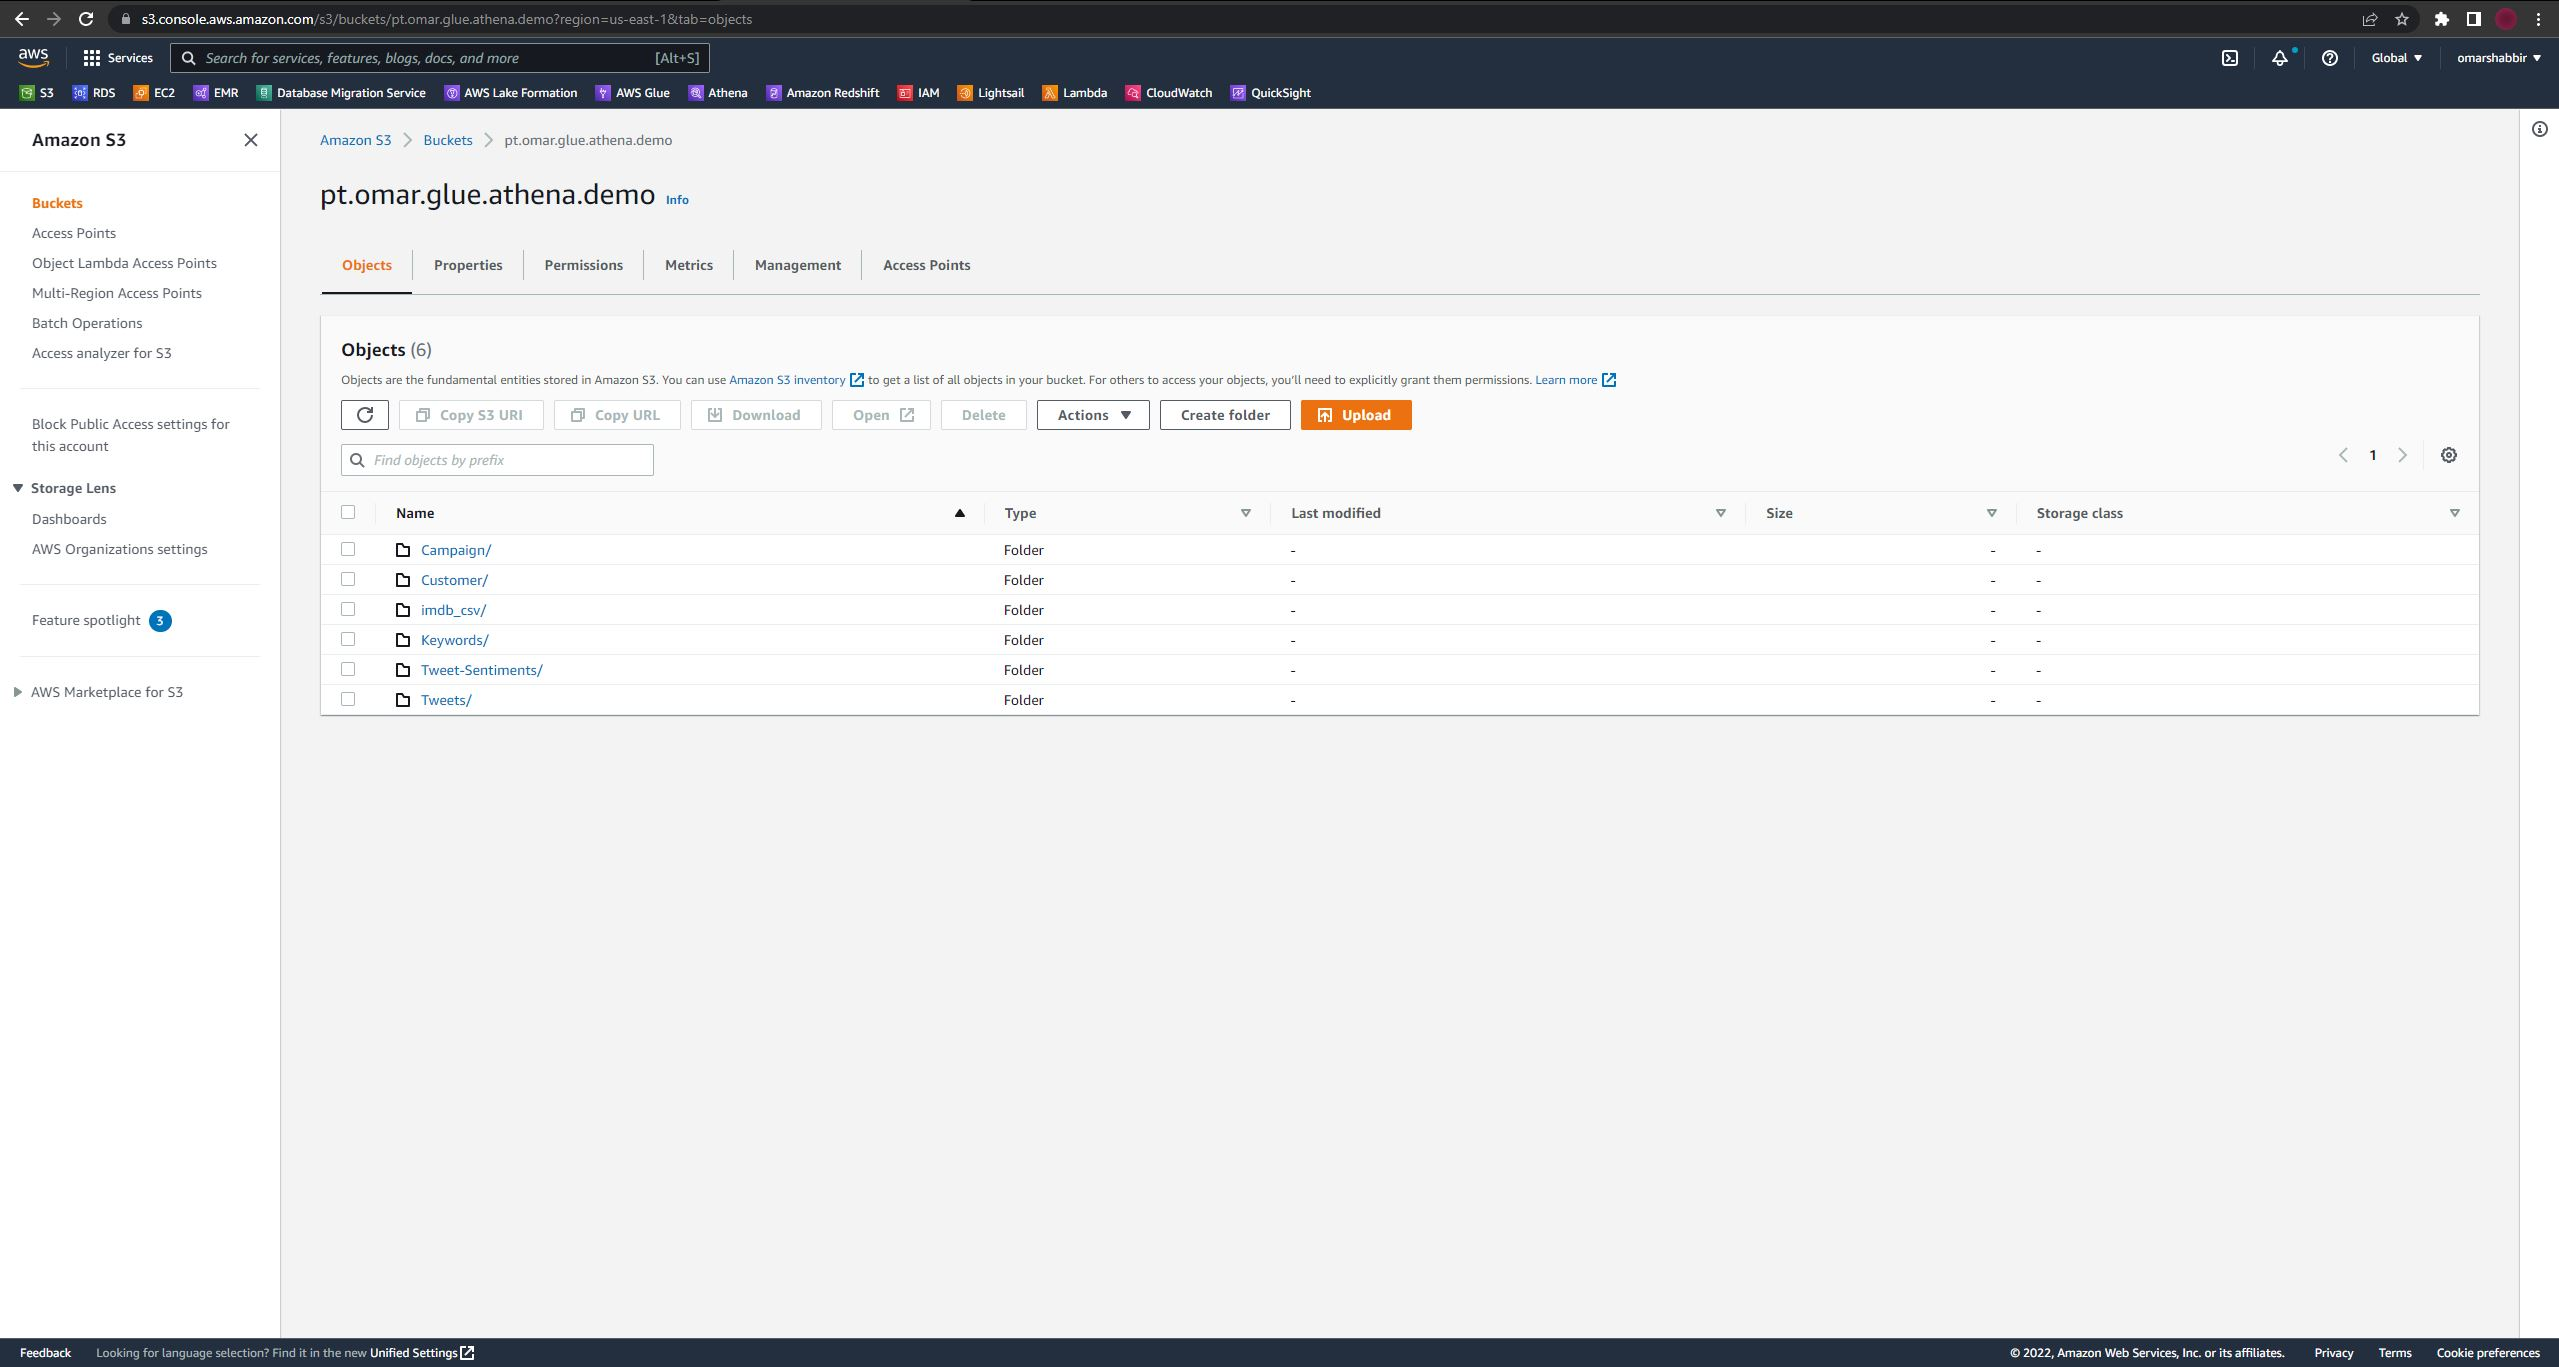

# Crawl Files to Redshift using Glue

## Create Crawlers
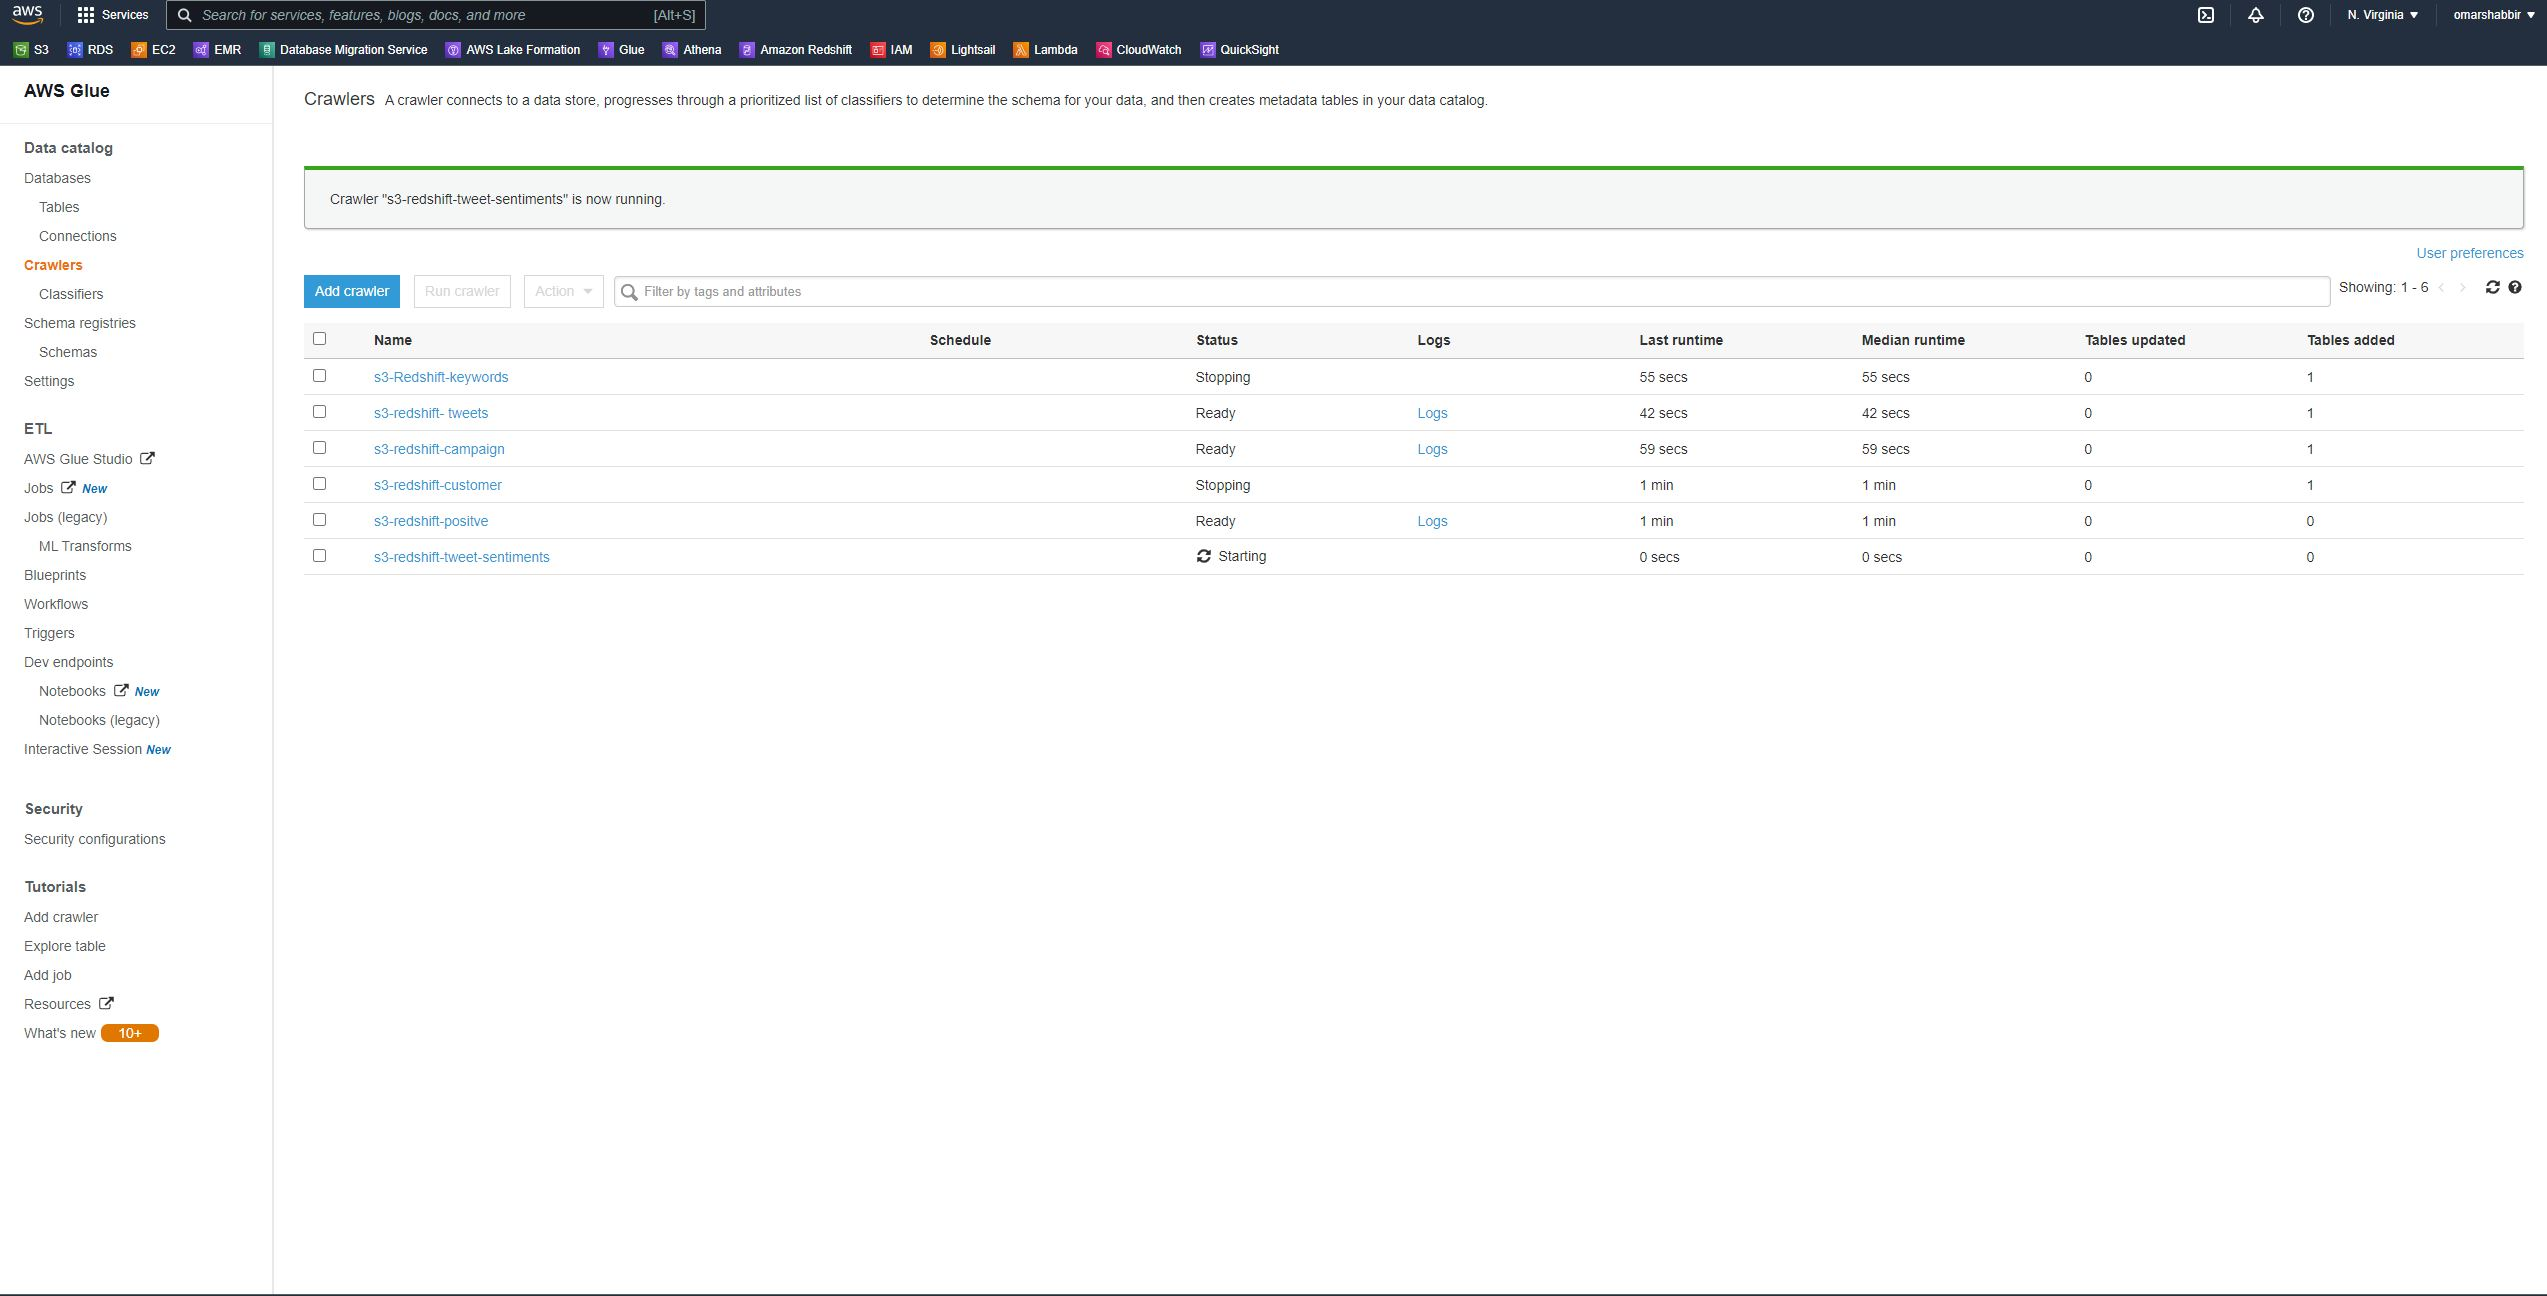

## Run Crawlers to creatre AWS Glue Tables
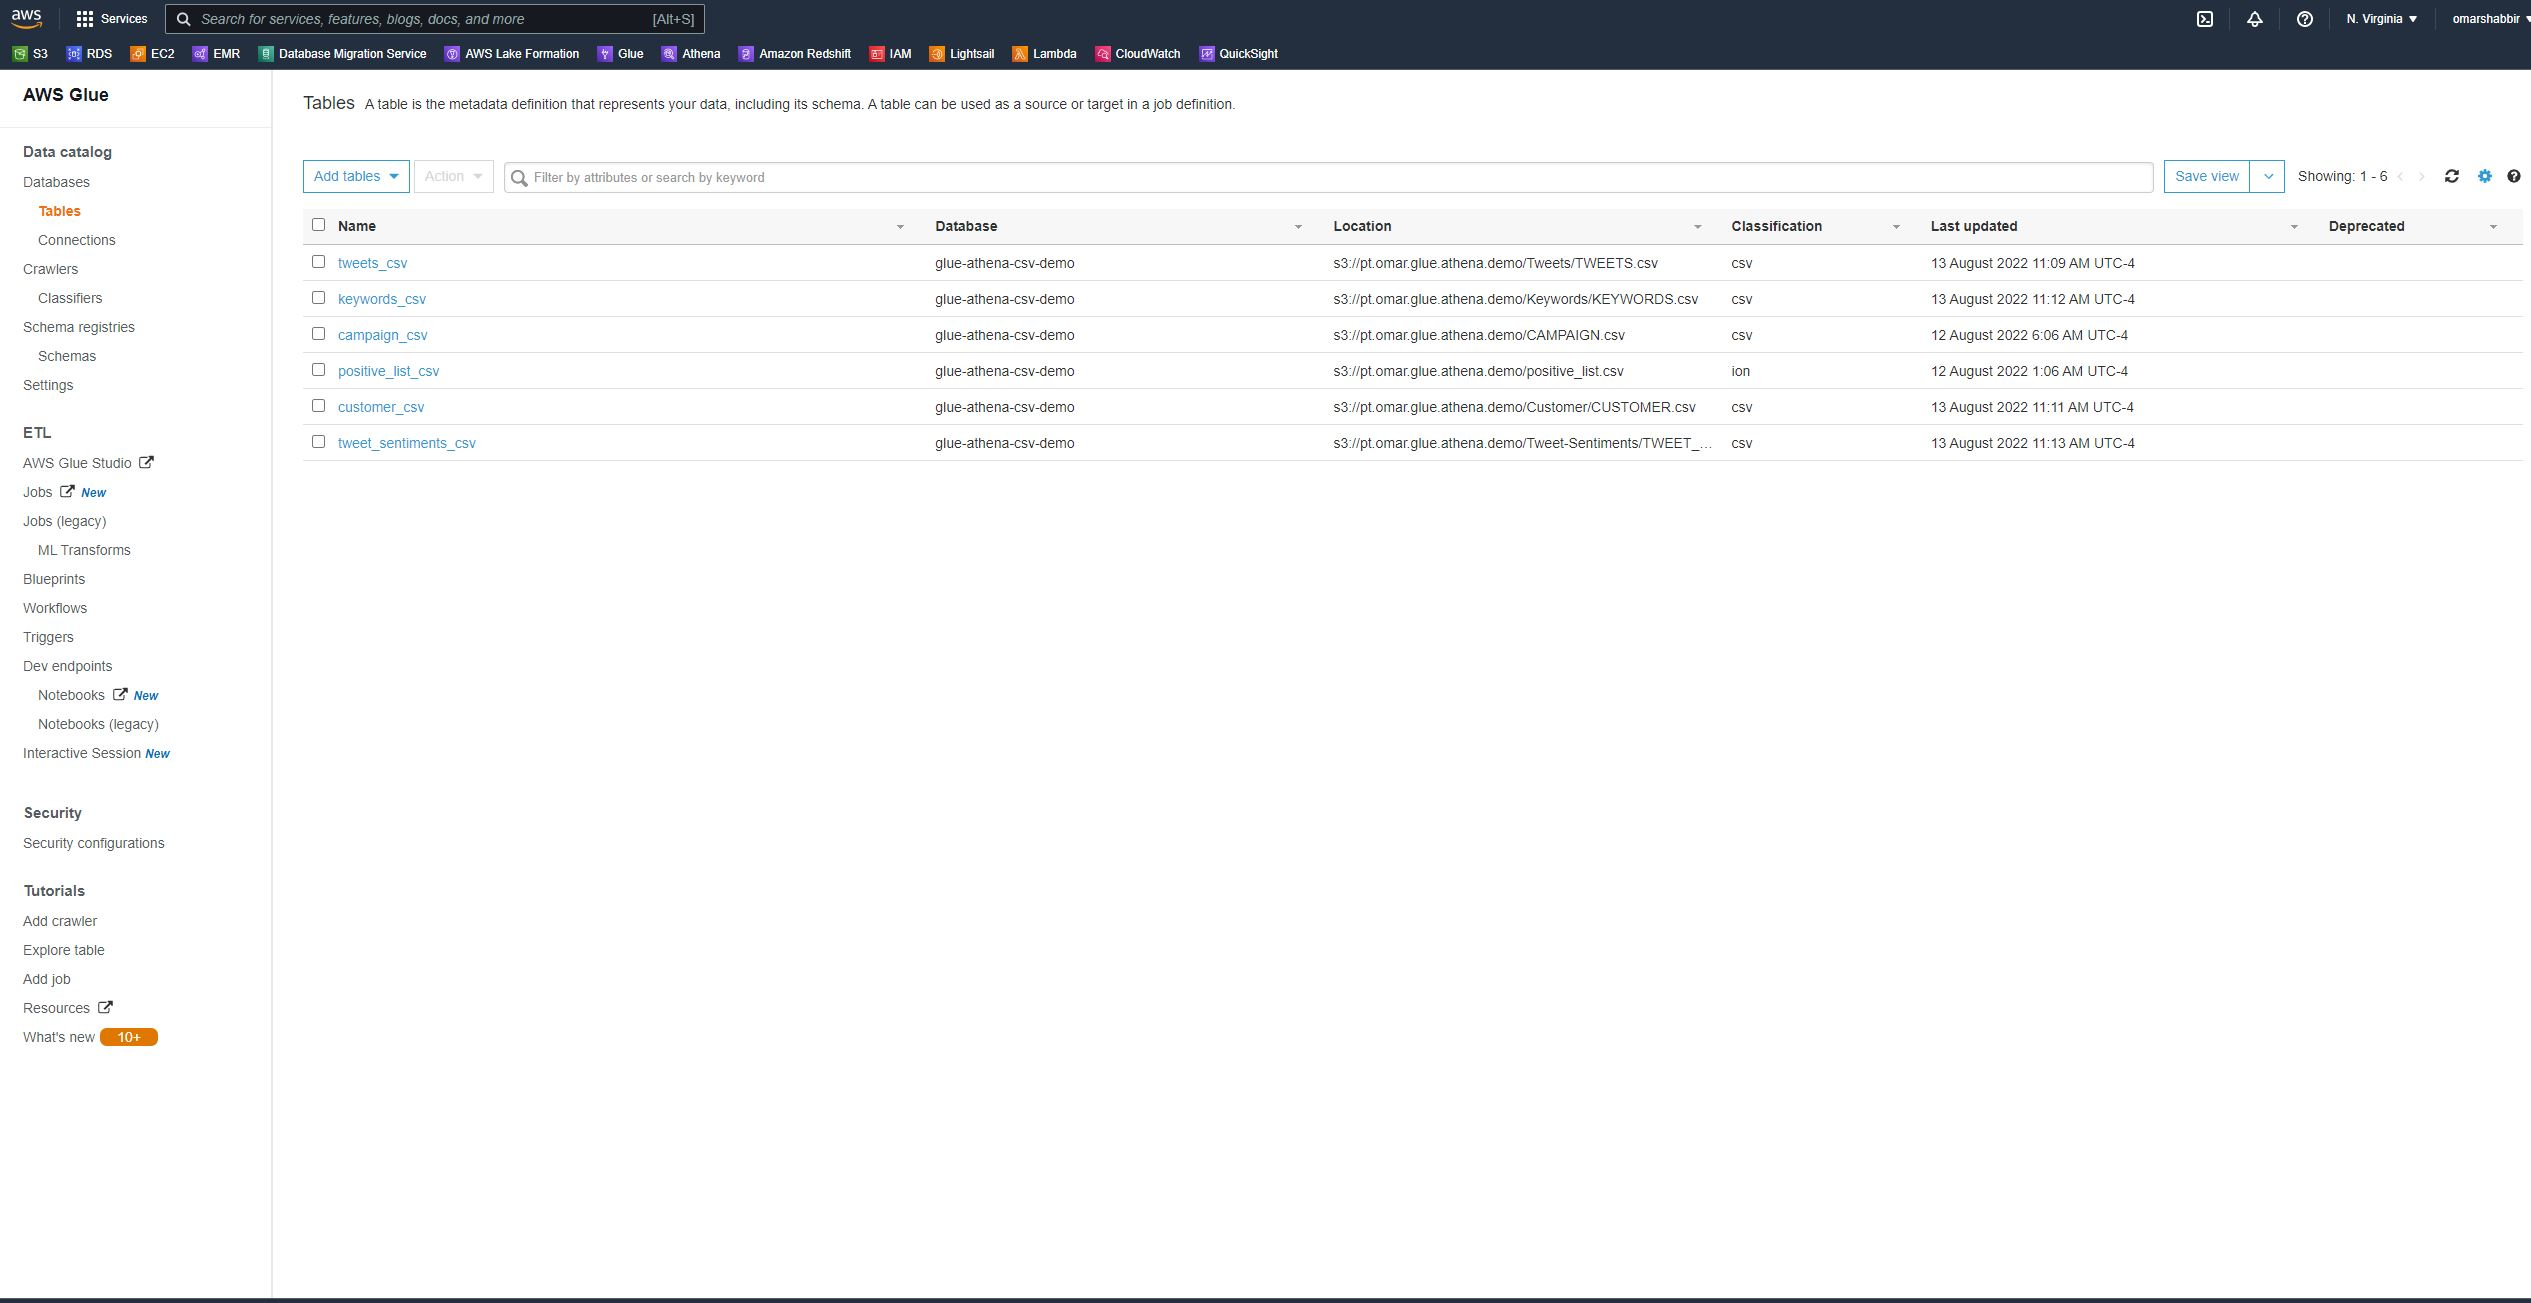

## Redshift Create External Tables
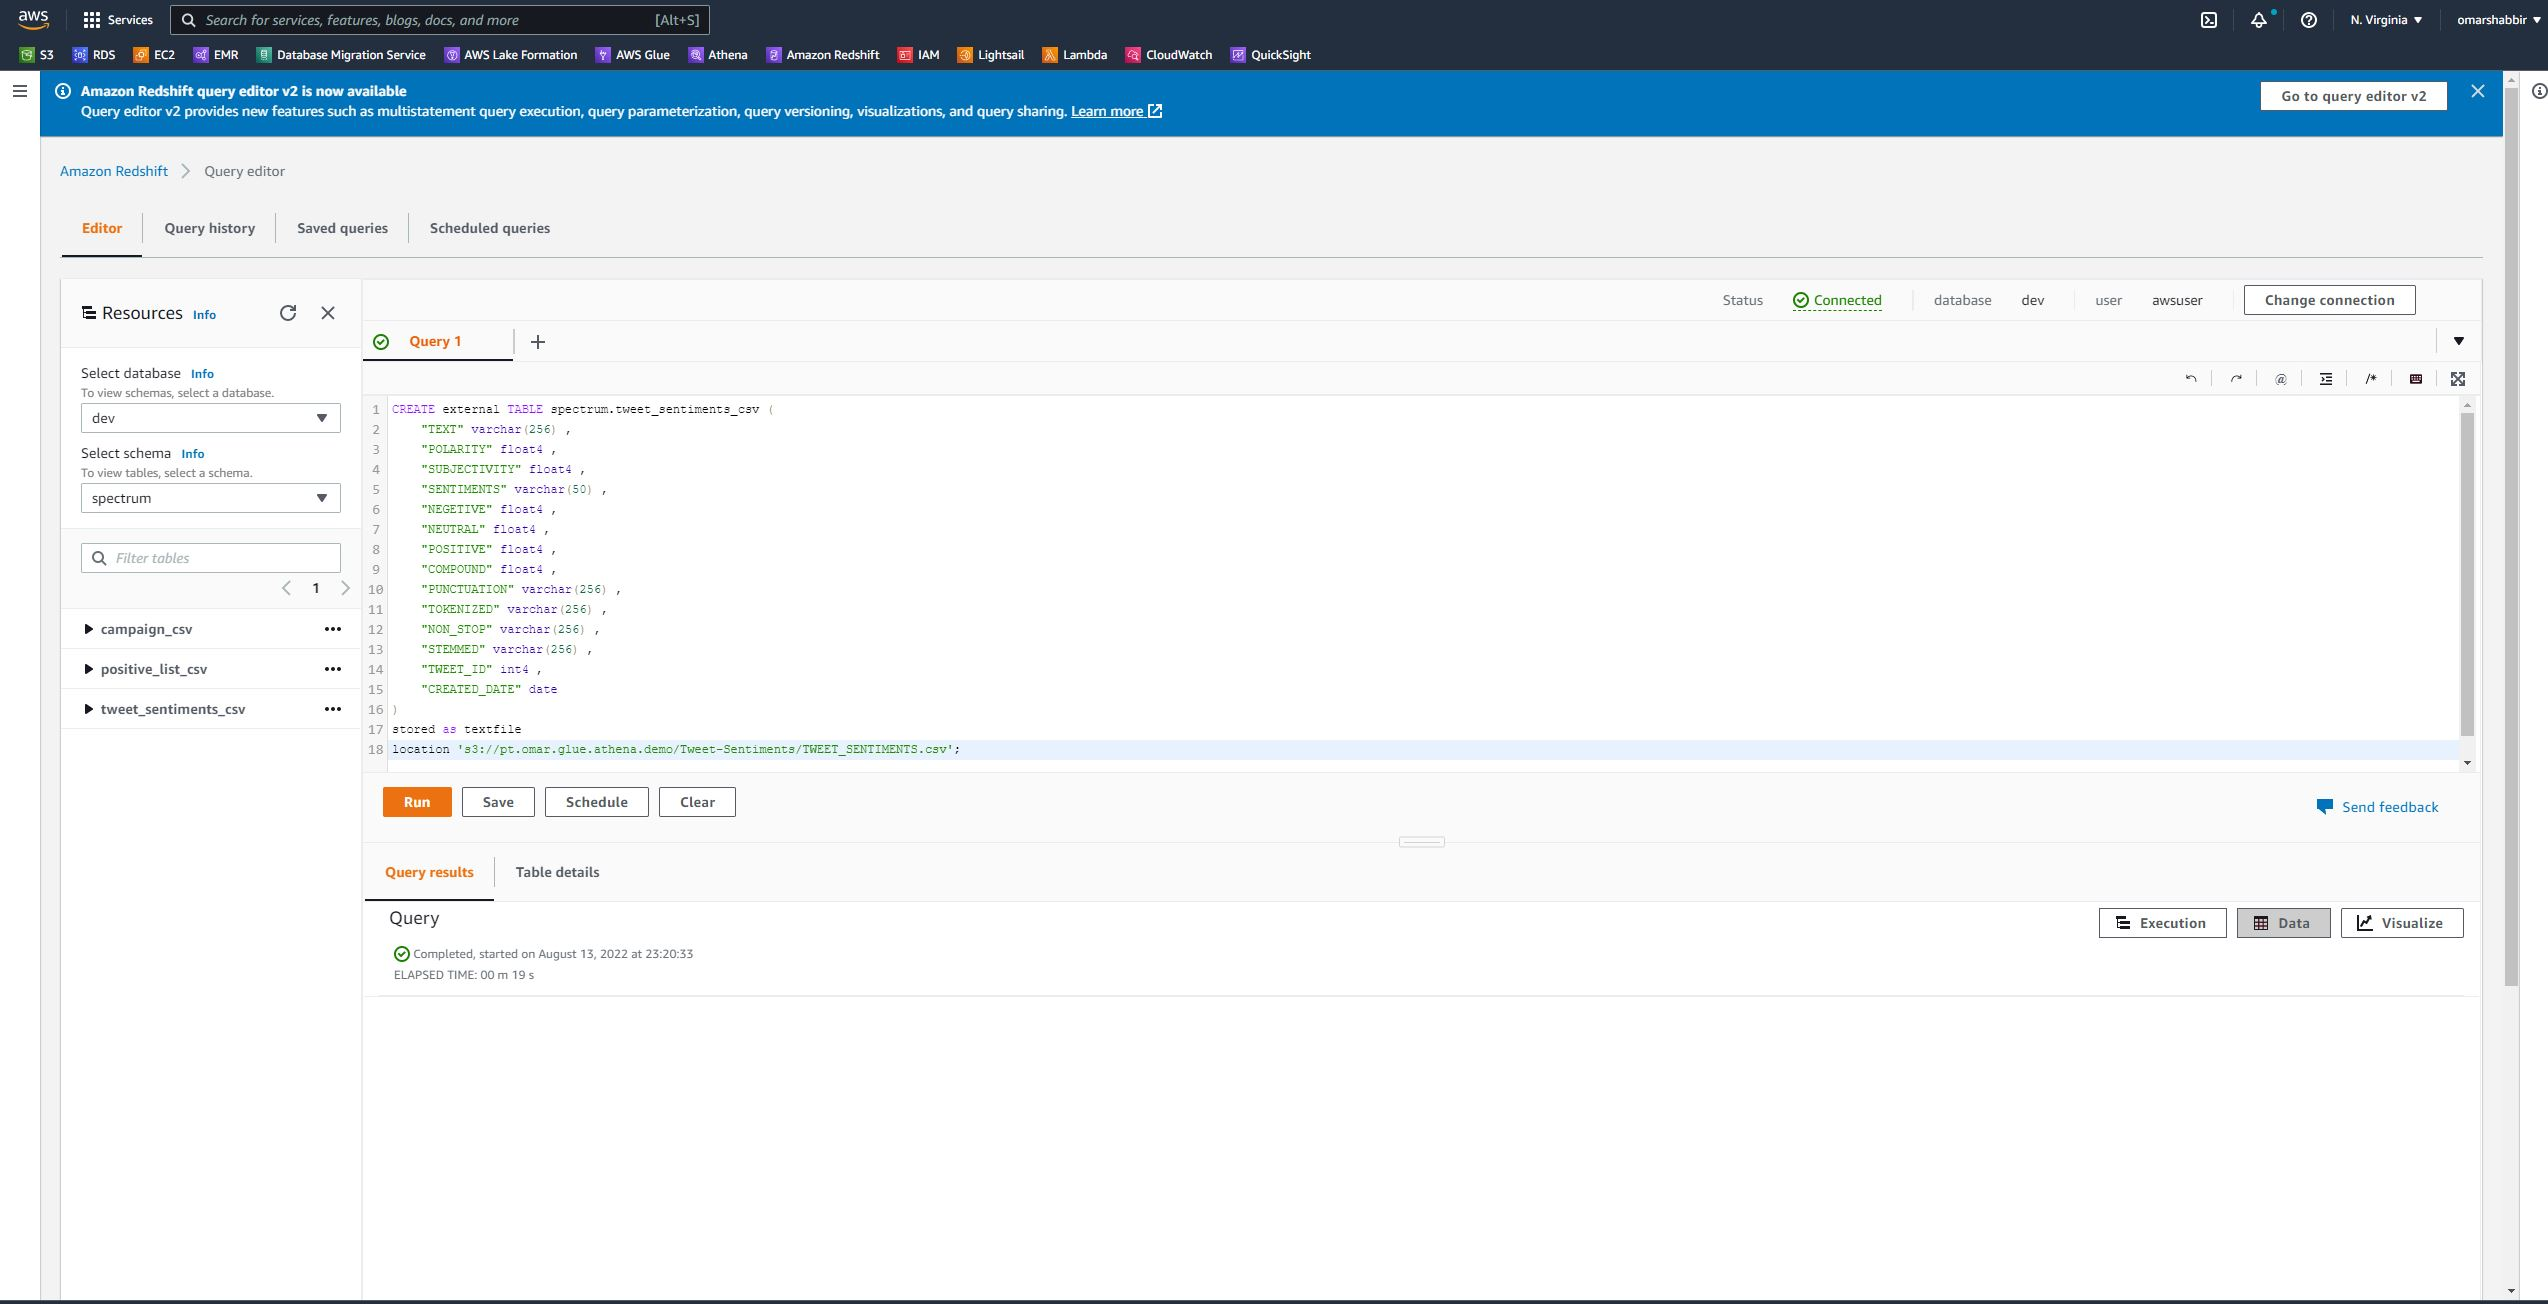

## RedShift Tweet Sentiments Table
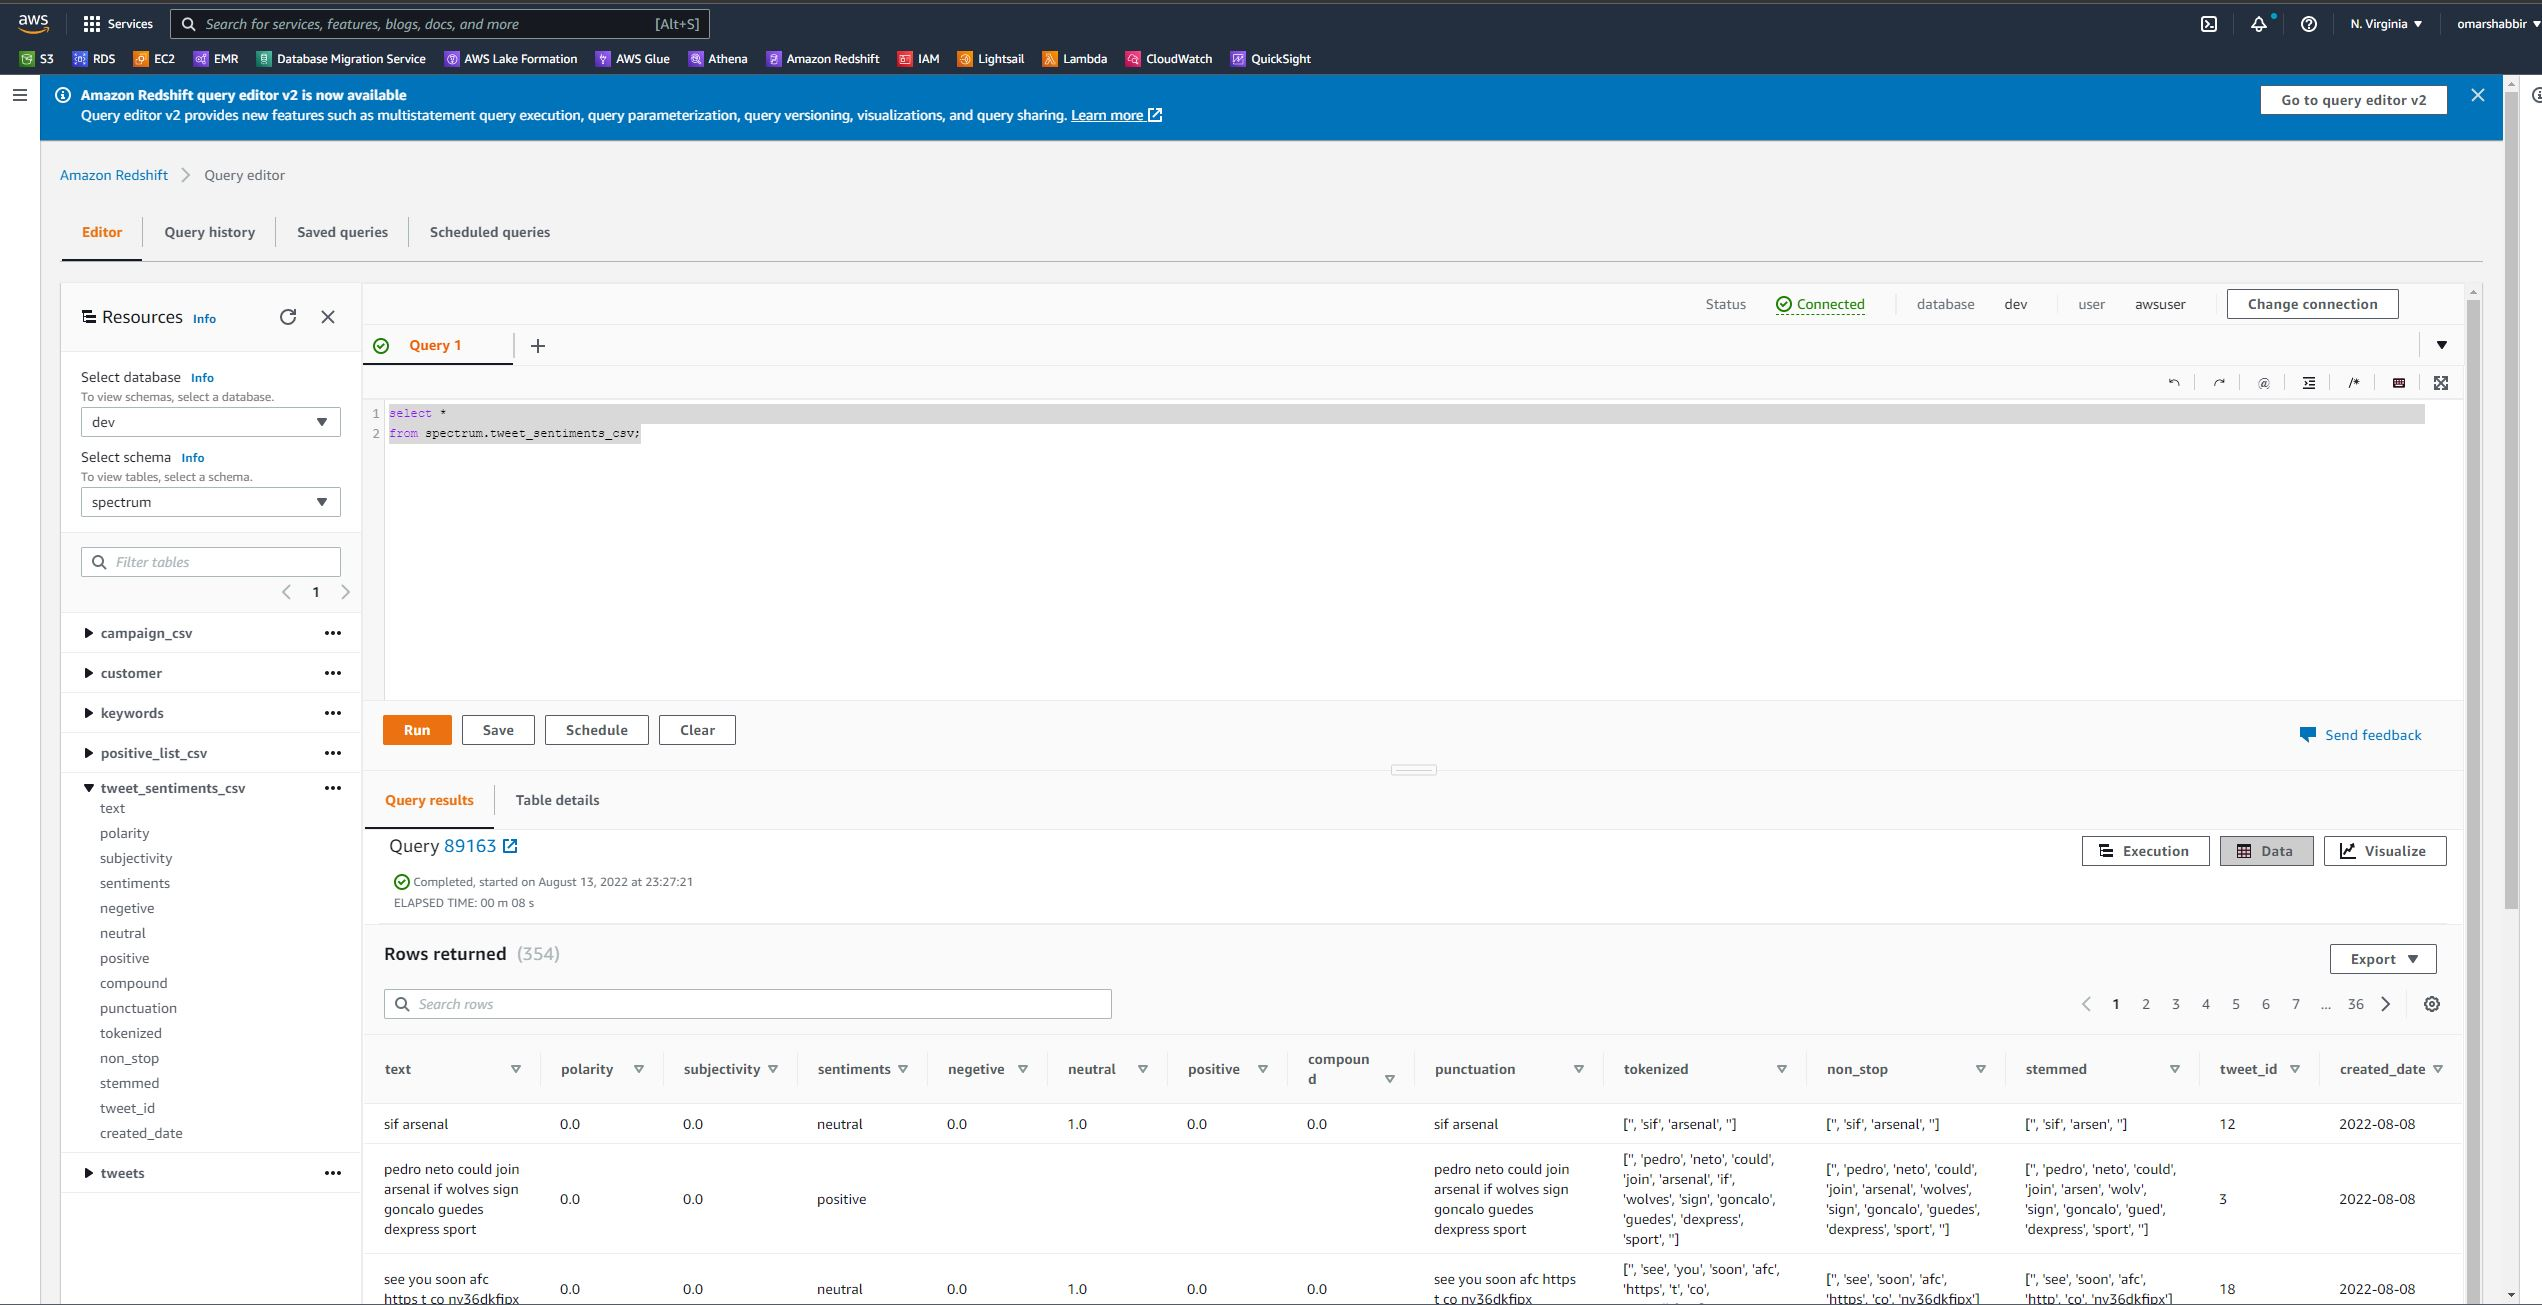

## Athena Tweet Sentiments Table
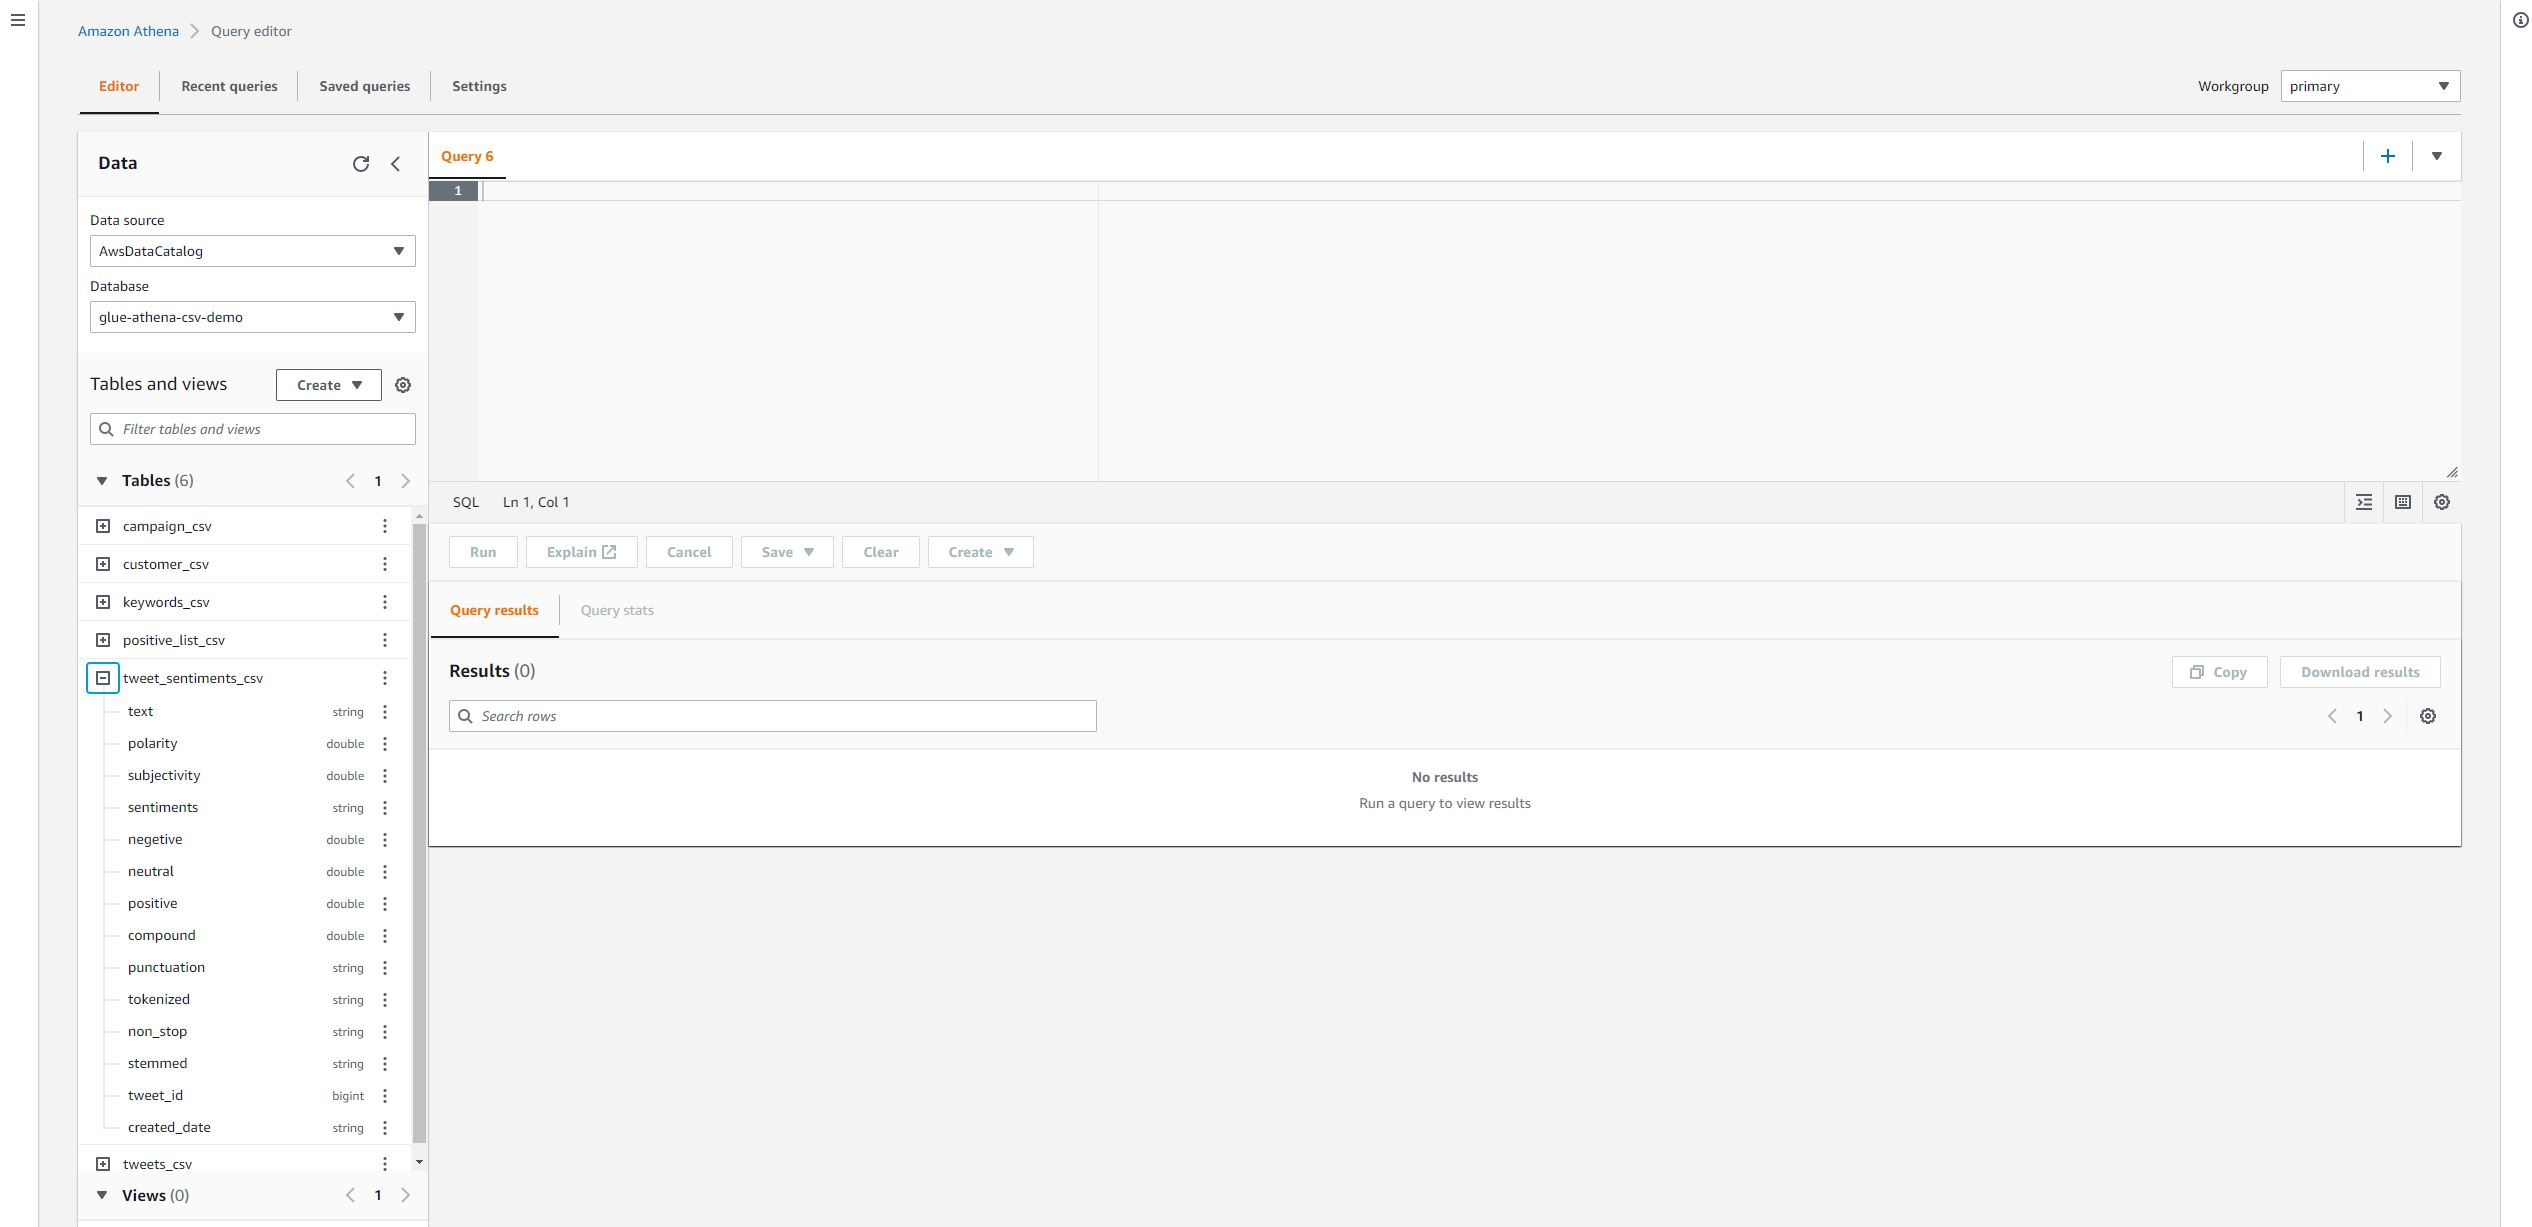

# Red Shift

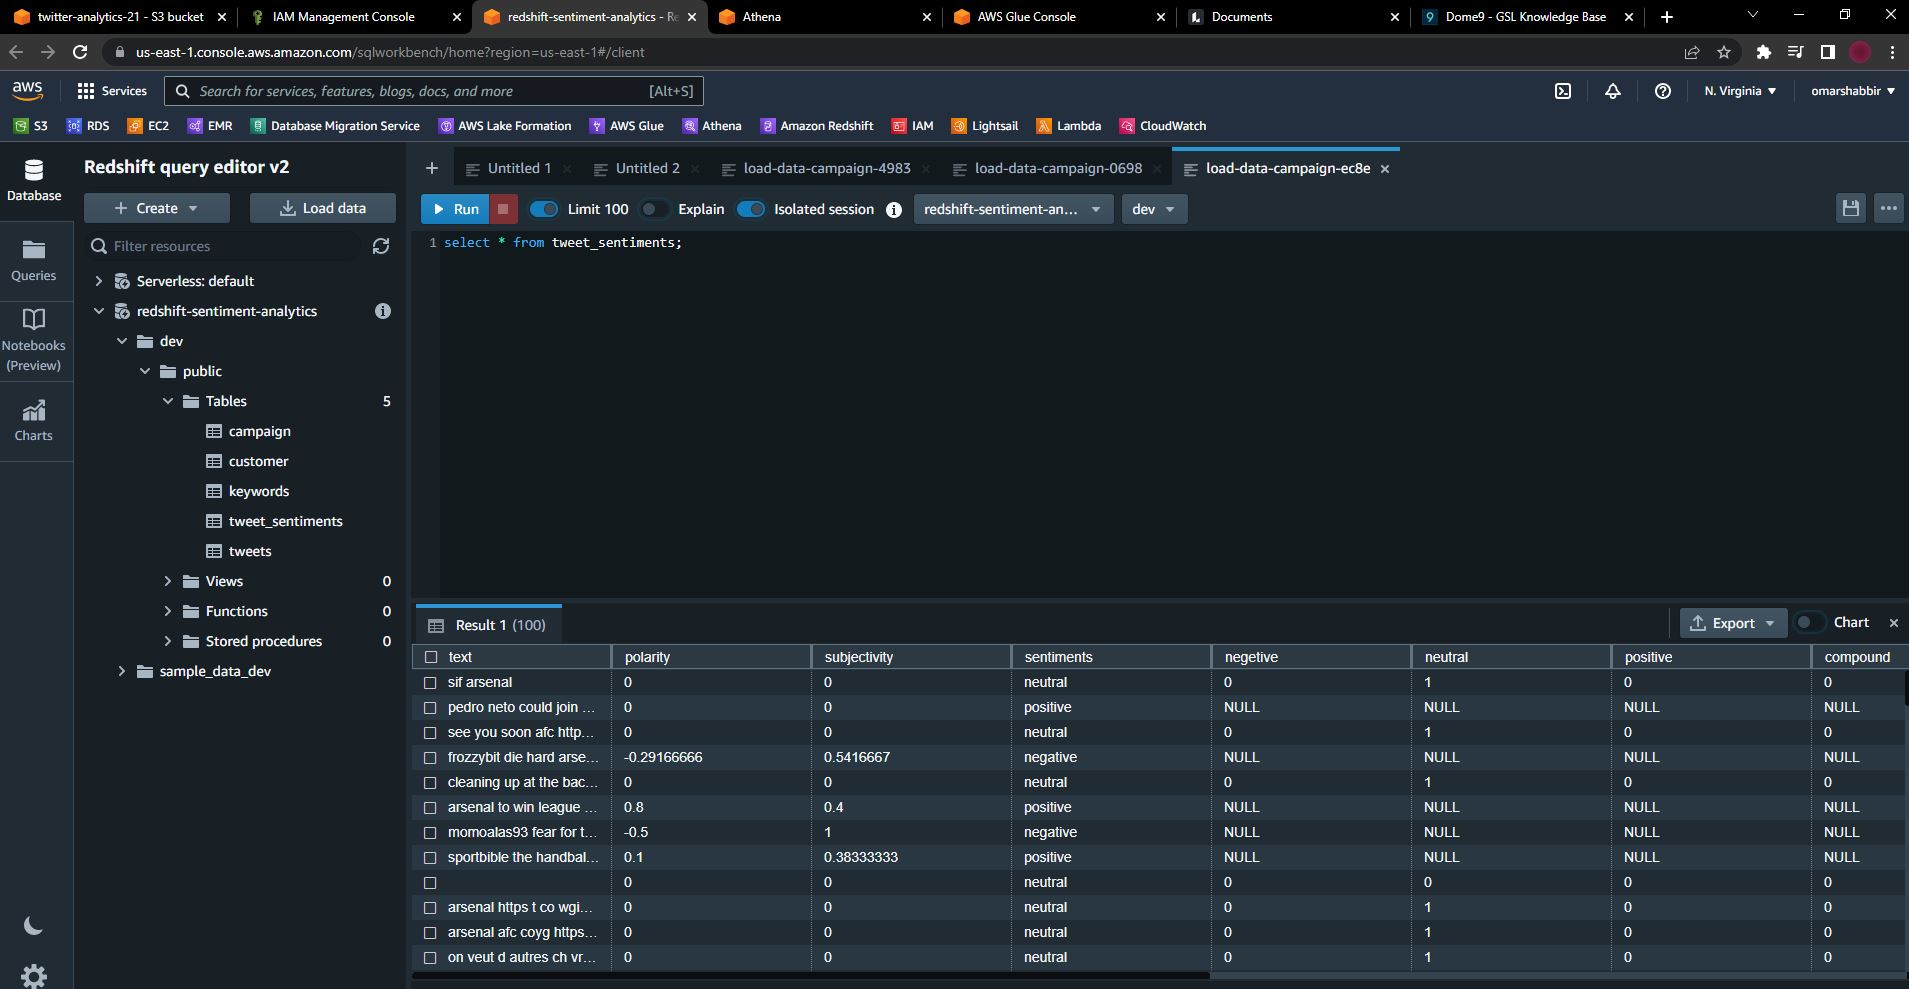

In [14]:
# Cleaning Tweets to Analyze Tweets, dropping duplicates using drop_duplicates function

tweet_list.drop_duplicates(inplace = True)

In [15]:
#Cleaning Text (RT, Punctuation etc)

tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc

remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
 # print(remove_rt)
rt = lambda x:  re.sub(r"https?://\S+",' ',re.sub(r'[^A-Za-z0-9\s]+',' ',x))
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.tail(10)

,0,text
184,The girl \n With the teeth that works \n At Wa...,the girl \n with the teeth that works \n at wa...
185,Walmart https://t.co/JtBPqvHnIO #Walmart,walmart https t co jtbpqvhnio walmart
186,RT @ZooCrochet_Tats: ¿Perdiste tu pulsera?\n#W...,perdiste tu pulsera \n walmart express jar...
190,That Zevo thing from Walmart works 🙌🏾,that zevo thing from walmart works
191,i did in fact drive my heat exhausted self to ...,i did in fact drive my heat exhausted self to ...
193,RT @ASchenna: #SummerReads \nA collection of s...,summerreads \na collection of short stories ...
194,@Andrea_Simmons @friendlycovid19 @mildmonkeypo...,andrea simmons friendlycovid19 mildmonkeypo...
197,@HarvestHillsYYC I will make a Walmart purchas...,harvesthillsyyc i will make a walmart purchas...
198,"RT @vicsurvivaliste: Hier, tournée de supermar...",hier tourn e de supermarch s incluant walma...
199,conspiracy theory: supermarkets put barely any...,conspiracy theory supermarkets put barely any...


In [16]:
#Using the clean data to calculate the polarity, sbjecivity, sentiment, -/+

tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
 score = SentimentIntensityAnalyzer().polarity_scores(row)
 neg = score['neg']
 neu = score['neu']
 pos = score['pos']
 comp = score['compound']
 if neg > pos:
     tw_list.loc[index, 'sentiment'] = "negative"
 elif pos > neg:
     tw_list.loc[index, 'sentiment'] = "positive"
 else:
     tw_list.loc[index, 'sentiment'] = "neutral"
     tw_list.loc[index, 'neg'] = neg
     tw_list.loc[index, 'neu'] = neu
     tw_list.loc[index, 'pos'] = pos
     tw_list.loc[index, 'compound'] = comp
# tw_list.head(10)

# QuickSight
## Sentiments
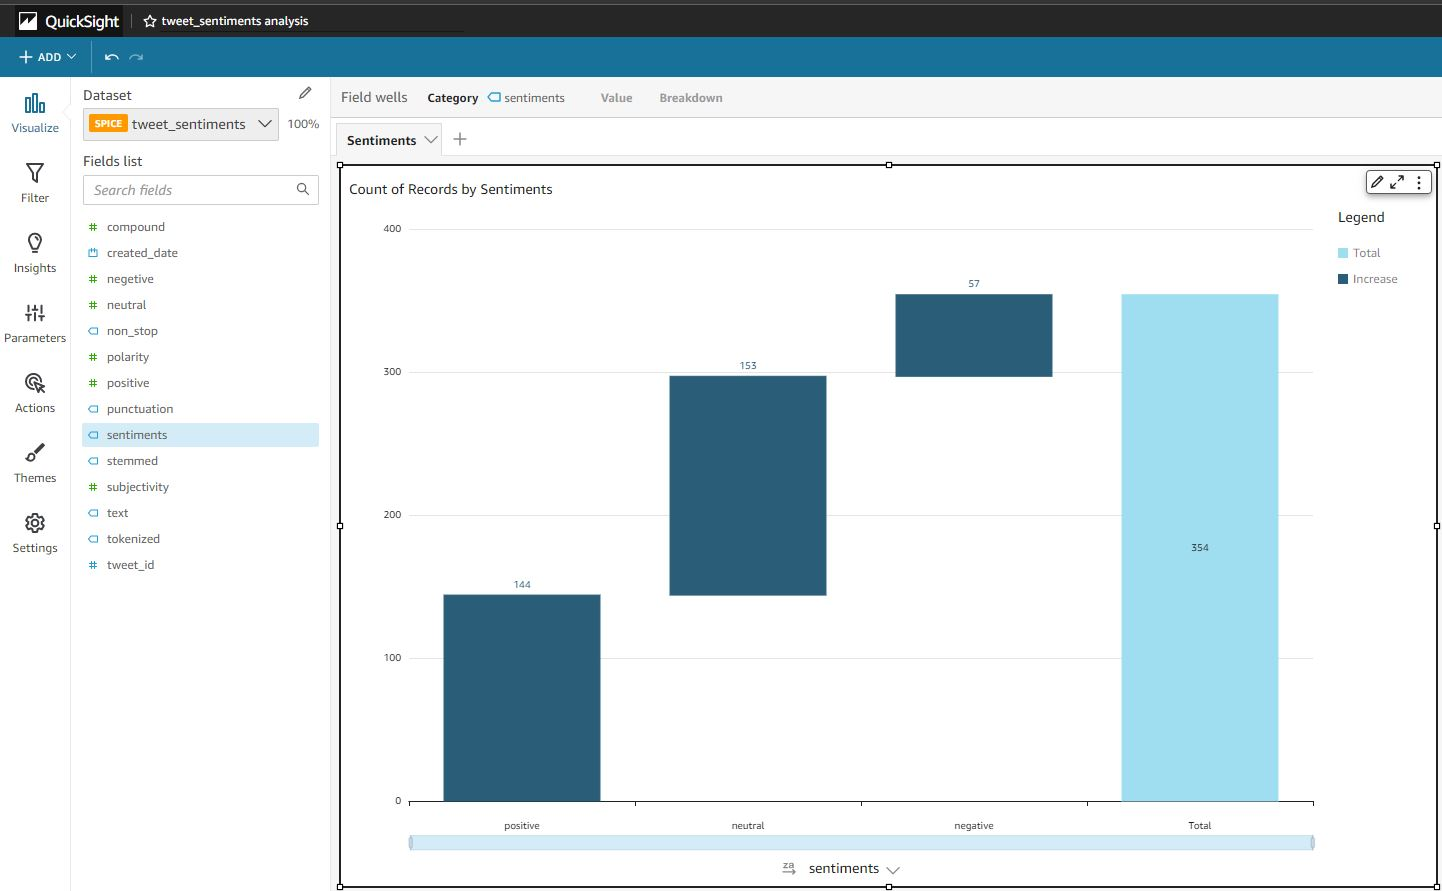
## Subjectivity
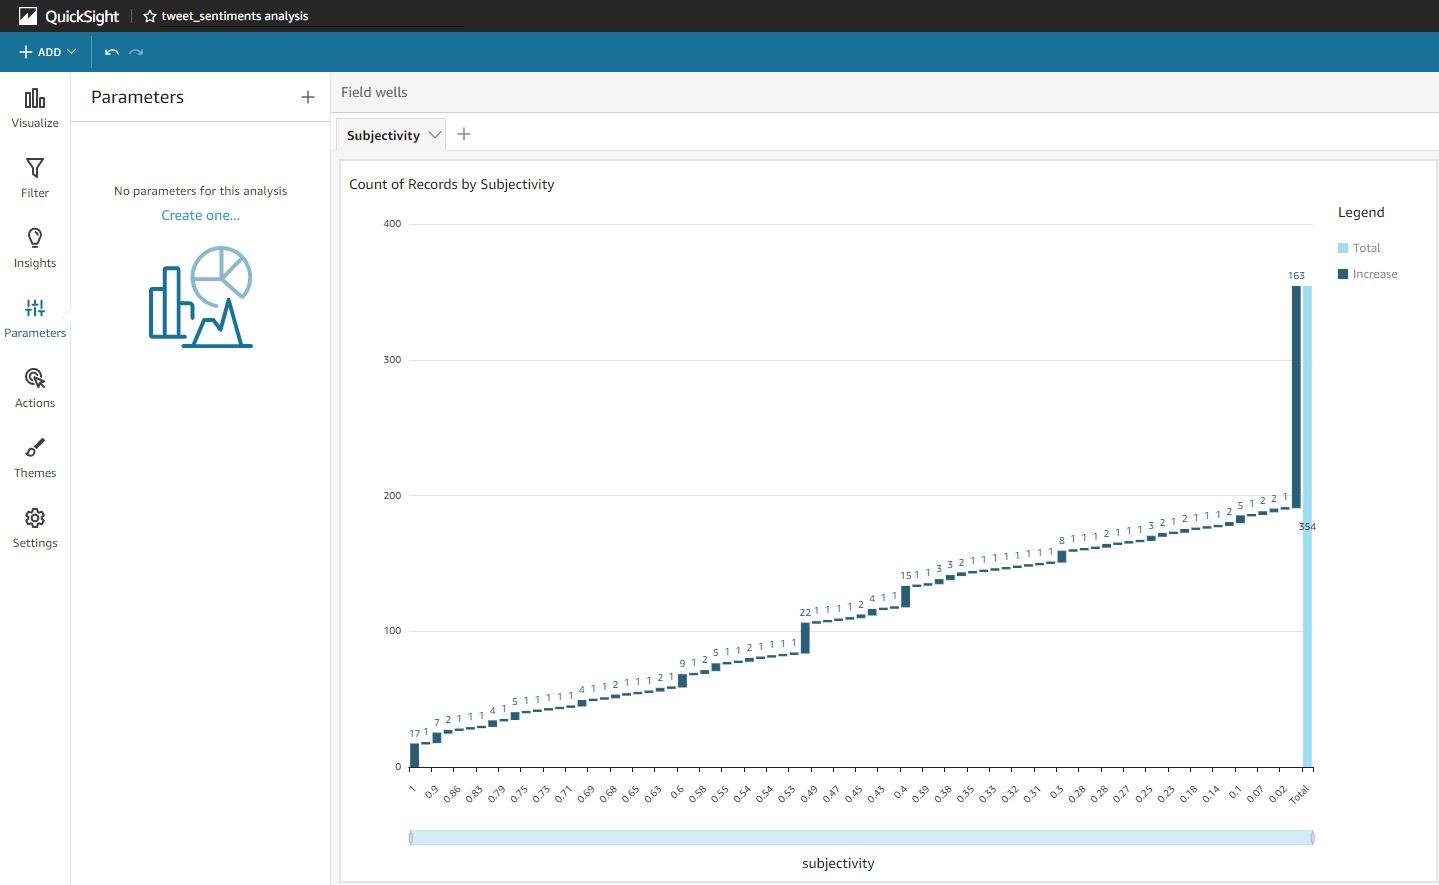

In [17]:
# Breaking data frame into 3

tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [18]:
# COunt for sentiments features
def count_values_in_column(data,feature):
 total=data.loc[:,feature].value_counts(dropna=False)
 percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
 return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
neutral,65,43.05
positive,48,31.79
negative,38,25.17


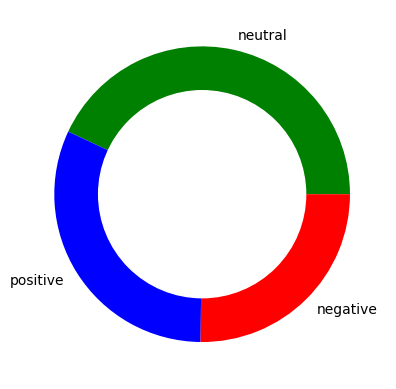

In [19]:
# create data for Pie Chart
pichart = count_values_in_column(tw_list,"sentiment")
names= pichart.index
size= pichart["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [20]:
# Upload Files
with io.StringIO() as csv_buffer:
    tw_list.to_csv(csv_buffer, index=False)

    response = s3_client.put_object(
        Bucket=AWS_S3_BUCKET, Key="files/tw_list_sentiment.csv", Body=csv_buffer.getvalue()
    )

    status = response.get("ResponseMetadata", {}).get("HTTPStatusCode")
    if status == 200:
        print(f"Successful S3 put_object response. Status - {status}")
    else:
        print(f"Unsuccessful S3 put_object response. Status - {status}")

Successful S3 put_object response. Status - 200


In [21]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [23]:
#Function to Create Wordcloud 
def create_wordcloud(text):
 mask = np.array(Image.open("cloud.png"))
 stopwords = set(STOPWORDS)
 wc = WordCloud(background_color="white",
 mask = mask,
 max_words=3000,
 stopwords=stopwords,
 repeat=True)
 wc.generate(str(text))
 wc.to_file("wc.png")
 print("Word Cloud Saved Successfully")
 path="wc.png"
 display(Image.open(path))

Word Cloud Saved Successfully


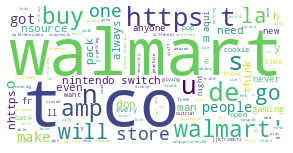

In [24]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list["text"].values)

Word Cloud Saved Successfully


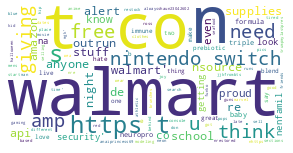

In [25]:
# for posticve tweets
create_wordcloud(tw_list_positive["text"].values)

Word Cloud Saved Successfully


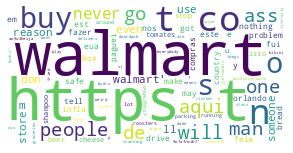

In [26]:
# for negative 
create_wordcloud(tw_list_negative["text"].values)

In [27]:
#Removing Punctuation

def remove_punct(text):
 text = "".join([char for char in text if char not in string.punctuation])
 text = re.sub('[0–9]+', '', text)
 return text
tw_list['punct'] = tw_list['text'].apply(lambda x: remove_punct(x))
#Appliyng tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text
tw_list['tokenized'] = tw_list['punct'].apply(lambda x: tokenization(x.lower()))
#Removing stopwords
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
tw_list['nonstop'] = tw_list['tokenized'].apply(lambda x: remove_stopwords(x))
#Appliyng Stemmer
ps = nltk.PorterStemmer()
def stemming(text):
    text = [ps.stem(word) for word in text]
    return text
tw_list['stemmed'] = tw_list['nonstop'].apply(lambda x: stemming(x))
#Cleaning Text
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text
tw_list.head()

# Upload Files
with io.StringIO() as csv_buffer:
    tw_list.to_csv(csv_buffer, index=False)

    response = s3_client.put_object(
        Bucket=AWS_S3_BUCKET, Key="files/tw_list_de_punctuation.csv", Body=csv_buffer.getvalue()
    )

    status = response.get("ResponseMetadata", {}).get("HTTPStatusCode")
    if status == 200:
        print(f"Successful S3 put_object response. Status - {status}")
    else:
        print(f"Unsuccessful S3 put_object response. Status - {status}")


Successful S3 put_object response. Status - 200


In [28]:
#Appliyng Countvectorizer

countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(tw_list['text'])
print('{} Number of reviews has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())

count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

151 Number of reviews has 950 words


,,abl,accept,acid,advic,afford,afterwork,ago,agosto,ah,...,yup,ywfylat,zevo,zmax,znevkzwwvj,zryzojxh,zvfjhsmm,zvjvxlcq,zxdxrtlzfw,zyzzhdfk
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
# Most Used Words
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

,0
walmart,116
http,64
co,63
de,13
get,12
like,10
go,9
amp,8
buy,7
nintendo,7


### References

1. https://towardsdatascience.com/
2. https://www.analyticsvidhya.com/blog/2021/08/creating-customized-word-cloud-in-python/
3. https://dylancastillo.co/nlp-snippets-clean-and-tokenize-text-with-python/ and class lessons